## 1. Carga de librerias, modelos y herramientas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utilsforecast.preprocessing import fill_gaps
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

In [2]:
def pretreat_data_df(df, col_name):
    new_df = df[df['interaction'] == col_name].copy()
    new_df.rename(columns={'data.value': col_name}, inplace=True)
    new_df.drop(columns='interaction', inplace=True)
    new_df.set_index('timestamp', inplace=True)
    new_df[col_name] = new_df[col_name].astype(float)
    return new_df

def pretreat_true_false_data_df(df, col_name):
    new_df = df[df['interaction'] == col_name].copy()
    new_df.rename(columns={'data.value': col_name}, inplace=True)
    new_df.drop(columns='interaction', inplace=True)
    new_df.set_index('timestamp', inplace=True)
    new_df[col_name] = new_df[col_name].apply(lambda x: 1 if x == 'true' else 0)
    return new_df

In [3]:
# Load the data
data = pd.read_csv('../data/wot-data-db.interactions-datas_sewy214.csv')
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.round("min").dt.tz_localize(None)
df_test = data[['timestamp', 'data.value', 'interaction']]

df_temperature = pretreat_data_df(df_test, 'temperature')
df_brightness = pretreat_data_df(df_test, 'brightness')
df_humidity = pretreat_data_df(df_test, 'humidity')
df_airpressure = pretreat_data_df(df_test, 'airpressure')
df_co2 = pretreat_data_df(df_test, 'CO2')

len(df_temperature), len(df_brightness), len(df_humidity), len(df_airpressure), len(df_co2)

(40321, 36026, 89930, 74426, 167201)

In [4]:
df_temperature.head()

temperature
timestamp                       
2023-03-03 09:31:00         19.0
2023-03-03 09:32:00         18.9
2023-03-03 09:34:00         19.0
2023-03-03 09:36:00         19.1
2023-03-03 09:37:00         19.3

In [5]:
df_airpressure.head()

airpressure
timestamp                       
2023-03-03 09:31:00     104350.0
2023-03-03 09:33:00     104360.0
2023-03-03 09:37:00     104350.0
2023-03-03 09:49:00     104340.0
2023-03-03 09:50:00     104330.0

In [6]:
df_brightness.head()

brightness
timestamp                      
2023-03-03 09:31:00      320.00
2023-03-03 09:37:00      326.08
2023-03-03 09:47:00      330.88
2023-03-03 09:48:00      320.00
2023-03-03 09:49:00      330.88

In [7]:
df_co2.head()

CO2
timestamp                  
2023-03-03 09:31:00  748.16
2023-03-03 09:32:00  773.76
2023-03-03 09:33:00  780.80
2023-03-03 09:34:00  792.32
2023-03-03 09:35:00  798.72

In [8]:
df_humidity.head()

humidity
timestamp                    
2023-03-03 09:31:00      23.8
2023-03-03 09:32:00      24.0
2023-03-03 09:33:00      24.3
2023-03-03 09:34:00      24.4
2023-03-03 09:35:00      24.5

In [9]:
def plot_data(df, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(df)
    plt.title('Sewy 214 ' + col_name)
    plt.ylabel(col_name)
    plt.show()

def plot_hist(df, col_name):
    plt.figure(figsize=(10,6))
    plt.hist(df)
    plt.title('Sewy 214 ' + col_name)
    plt.ylabel('Frequency')
    plt.show()

def plot_day_data(df, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(df[col_name].loc['2023-03-05'])
    plt.title('1 day Sewy 214 ' + col_name)
    plt.ylabel(col_name)
    plt.show()

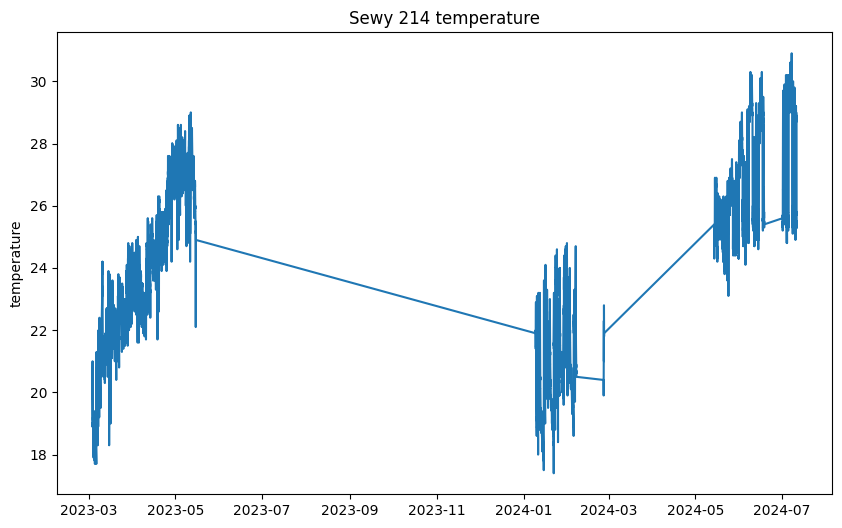

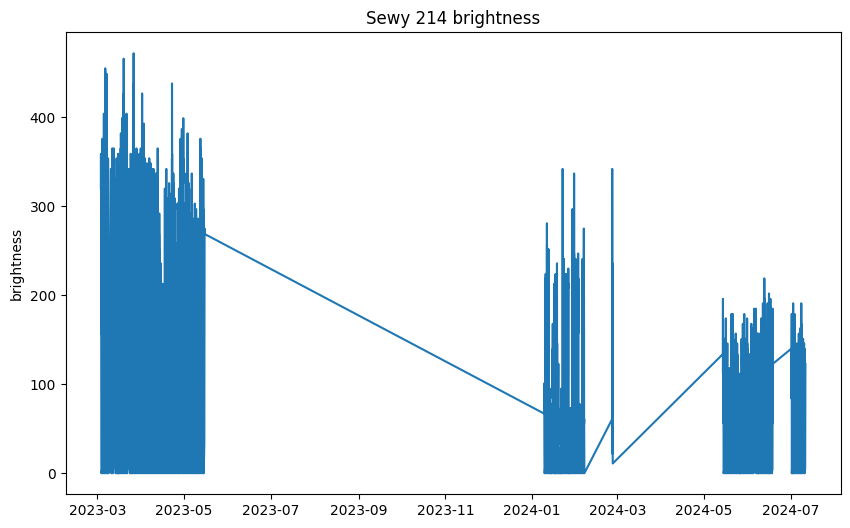

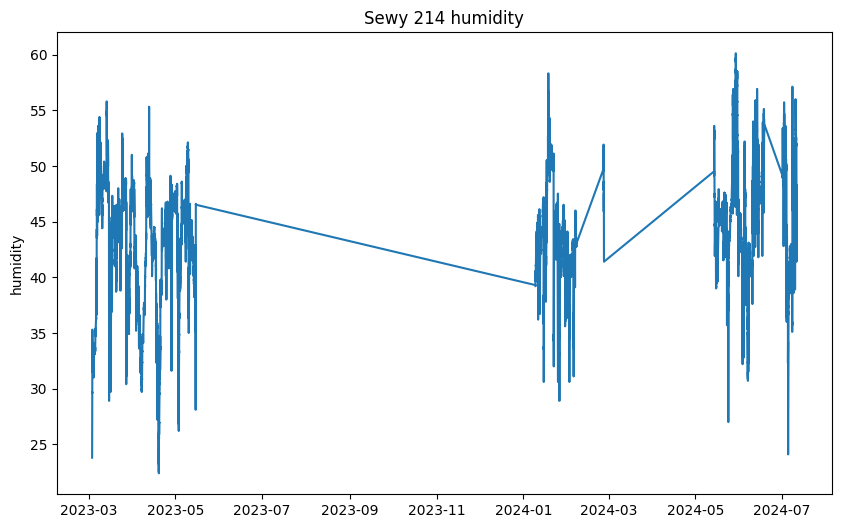

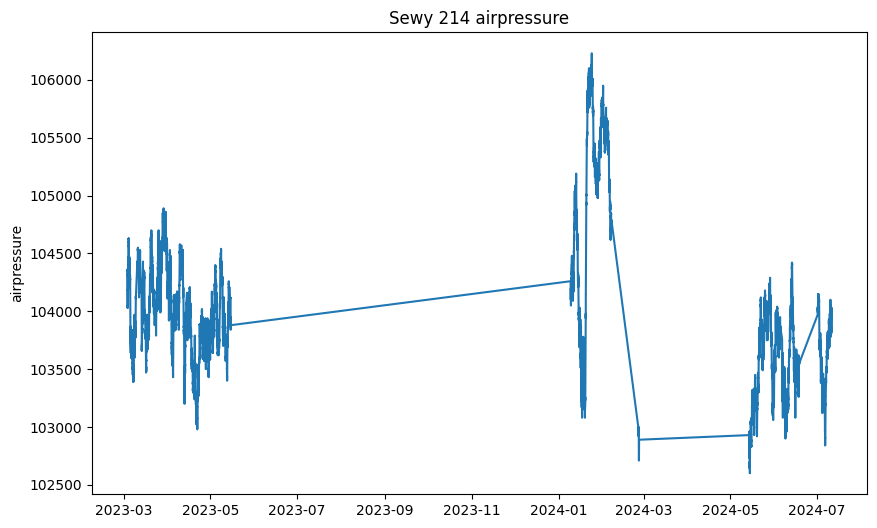

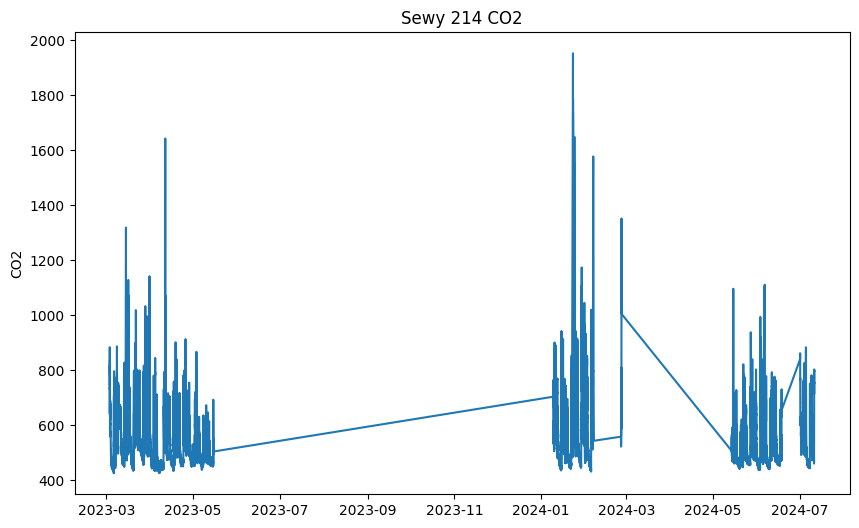

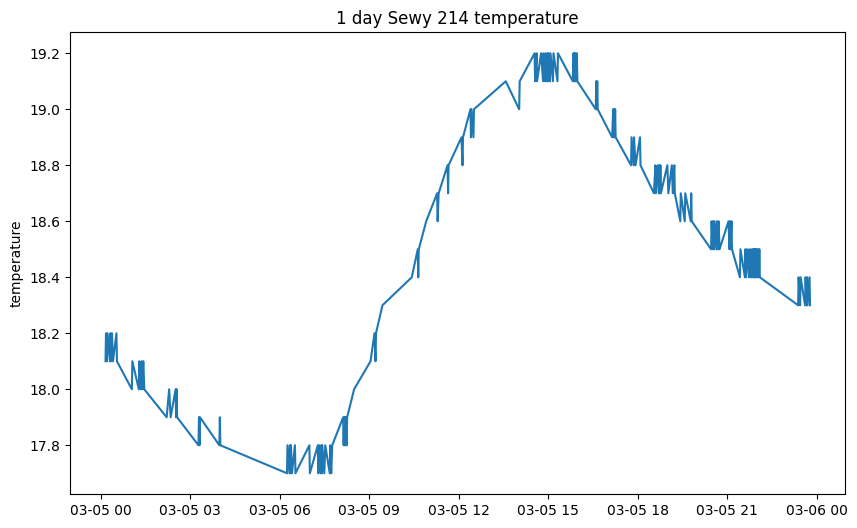

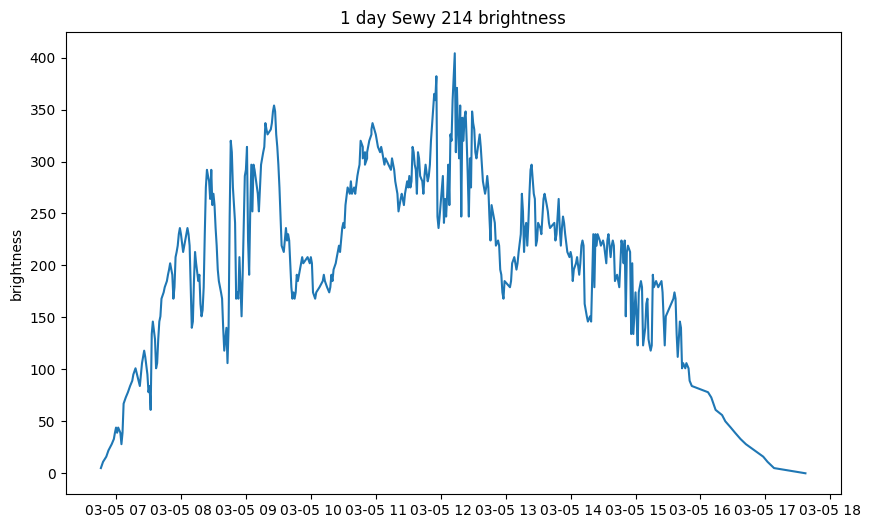

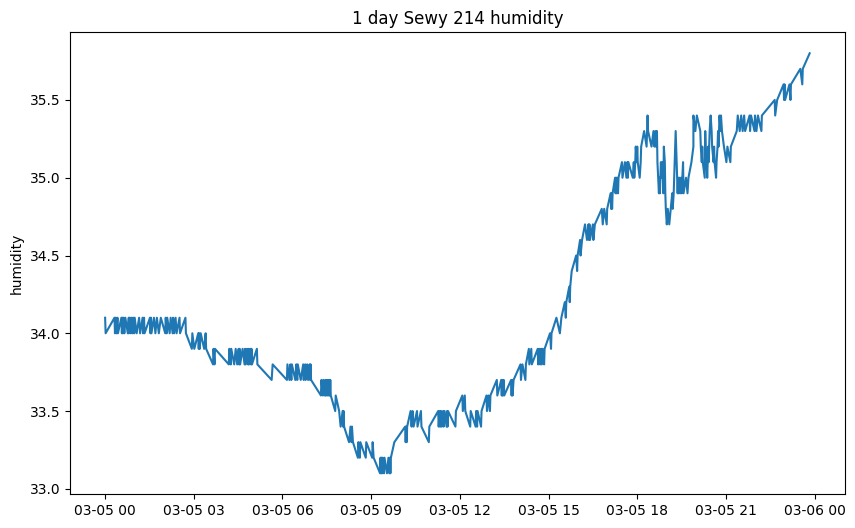

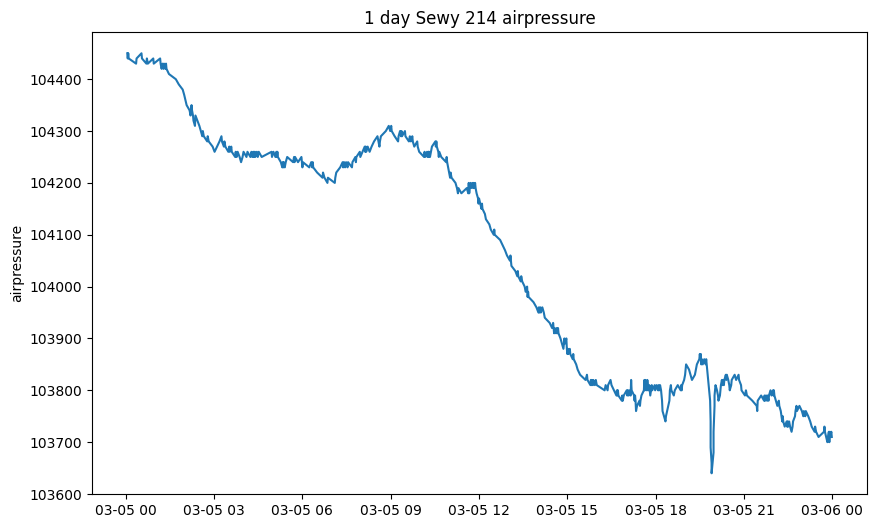

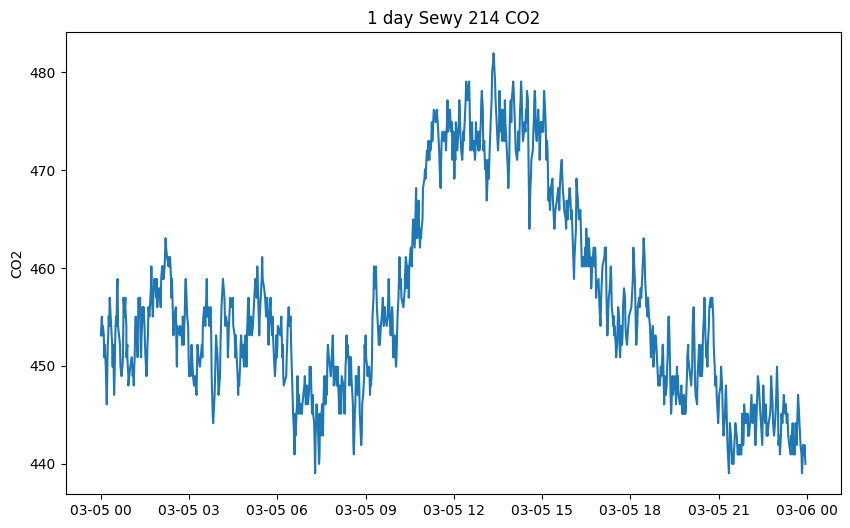

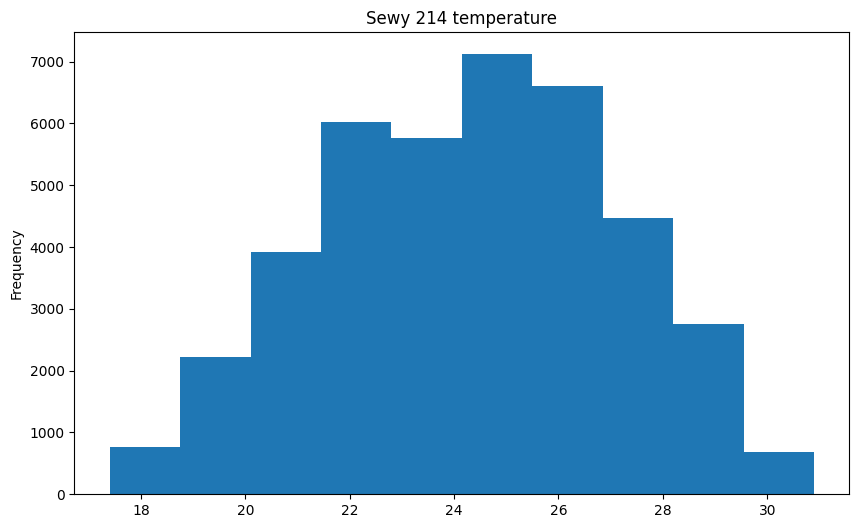

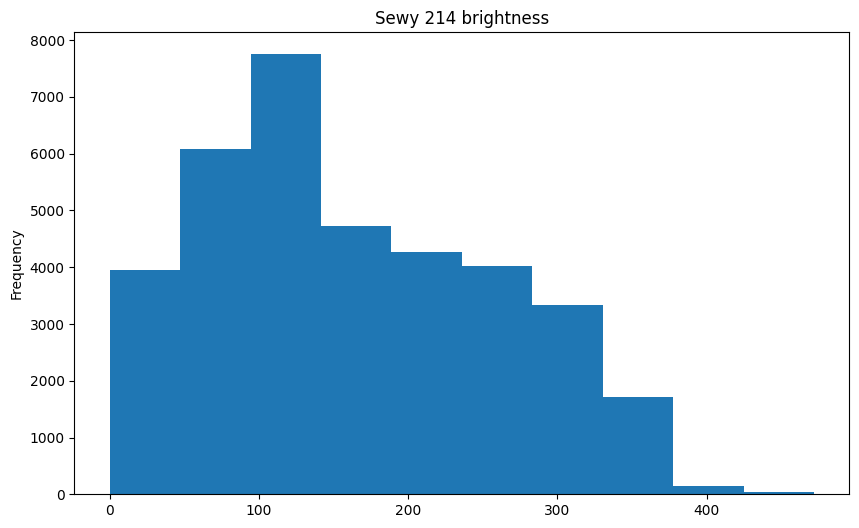

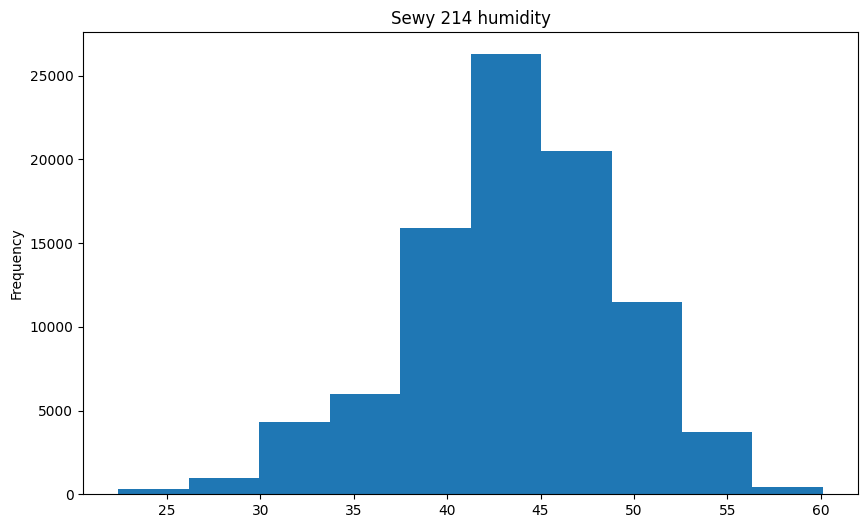

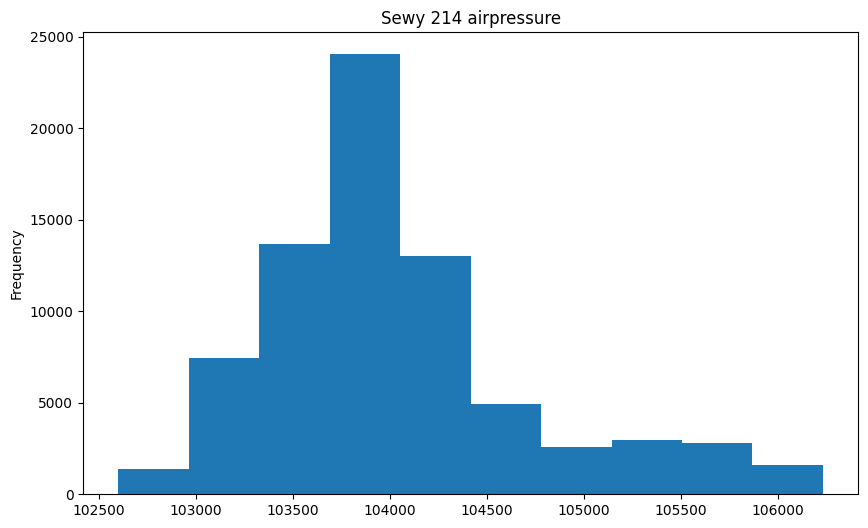

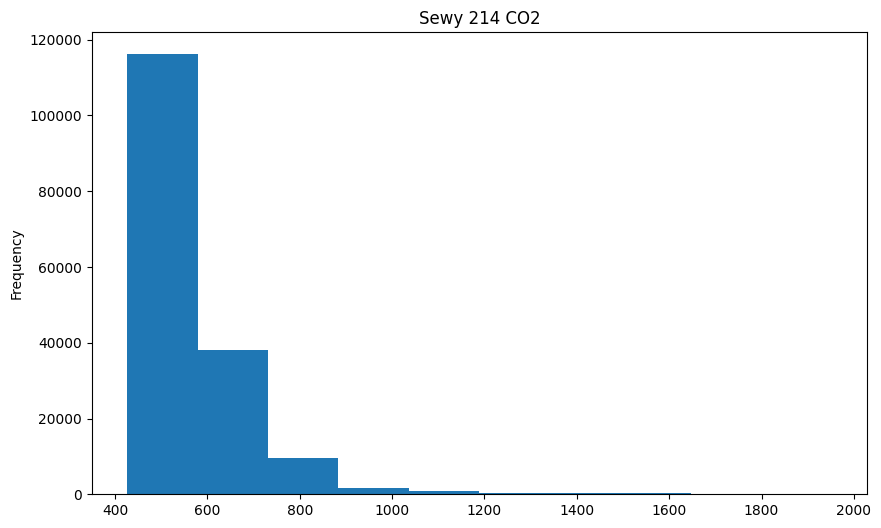

In [10]:
plot_data(df_temperature, 'temperature')
plot_data(df_brightness, 'brightness')
plot_data(df_humidity, 'humidity')
plot_data(df_airpressure, 'airpressure')
plot_data(df_co2, 'CO2')
plot_day_data(df_temperature, 'temperature')
plot_day_data(df_brightness, 'brightness')
plot_day_data(df_humidity, 'humidity')
plot_day_data(df_airpressure, 'airpressure')
plot_day_data(df_co2, 'CO2')
plot_hist(df_temperature, 'temperature')
plot_hist(df_brightness, 'brightness')
plot_hist(df_humidity, 'humidity')
plot_hist(df_airpressure, 'airpressure')
plot_hist(df_co2, 'CO2')

Debido a todos estos problemas, se ha optado por tomar únicamente el tramo entre marzo y mayo de 2023.

In [11]:
def reduce_df(df, start_date, end_date):
    return df[(df.index >= start_date) & (df.index <= end_date)]

In [12]:
reduced_df_temperature = reduce_df(df_temperature, '2023-03-01', '2023-05-15')
reduced_df_brightness = reduce_df(df_brightness, '2023-03-01', '2023-05-15')
reduced_df_humidity = reduce_df(df_humidity, '2023-03-01', '2023-05-15')
reduced_df_airpressure = reduce_df(df_airpressure, '2023-03-01', '2023-05-15')
reduced_df_co2 = reduce_df(df_co2, '2023-03-01', '2023-05-15')

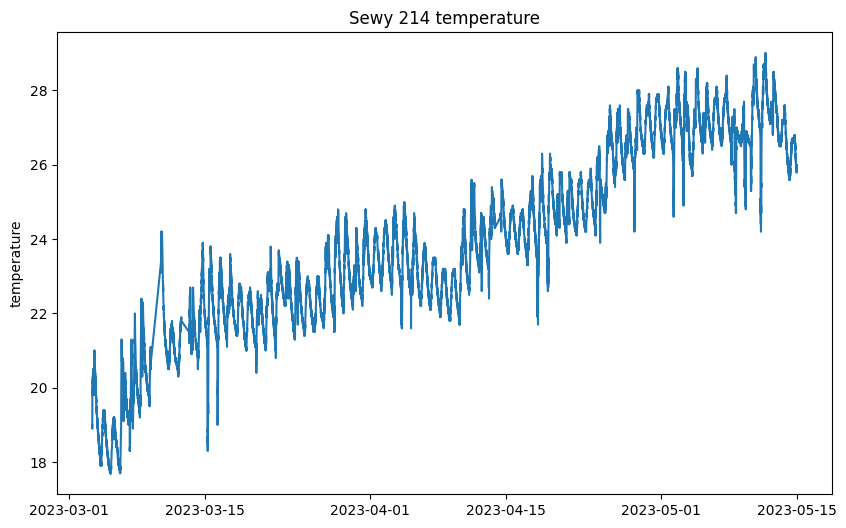

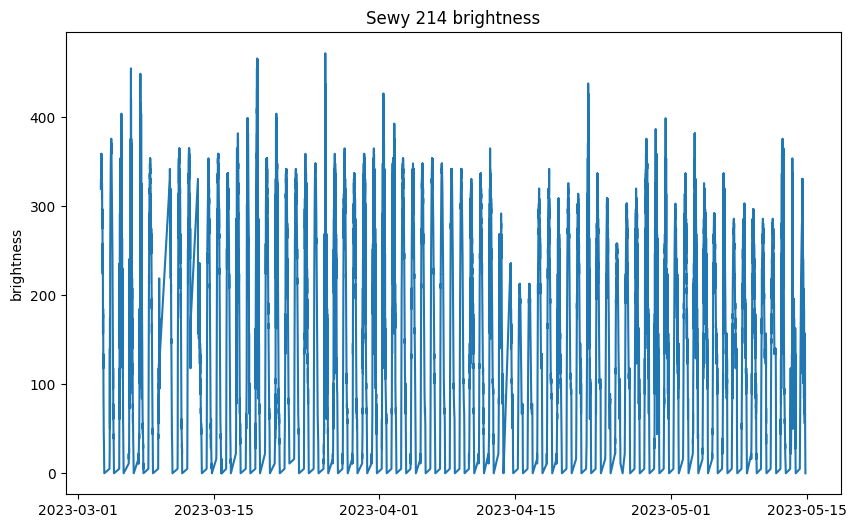

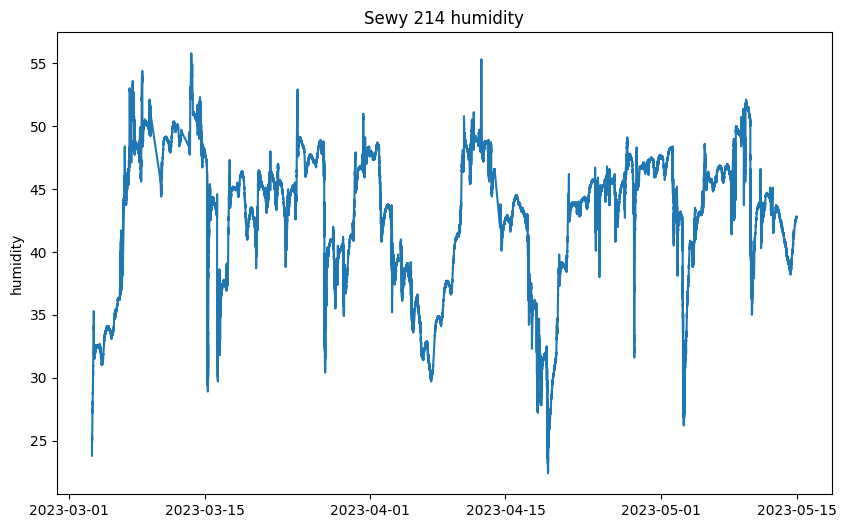

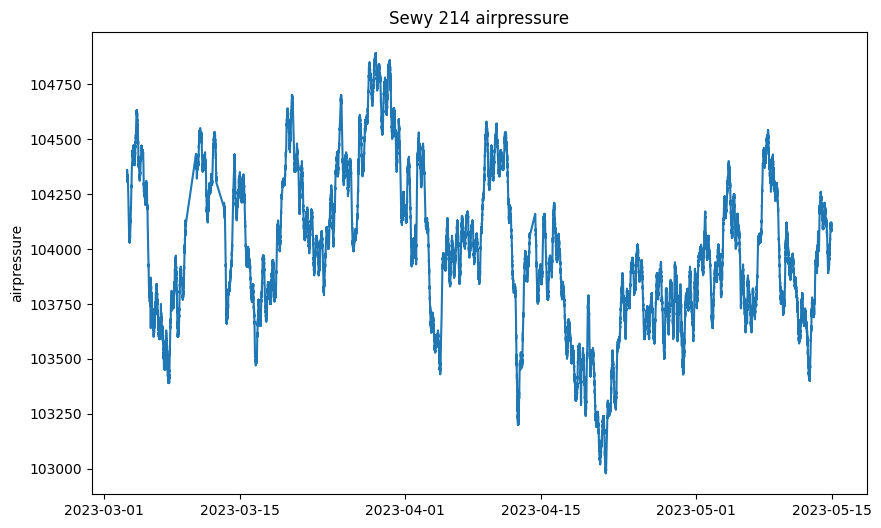

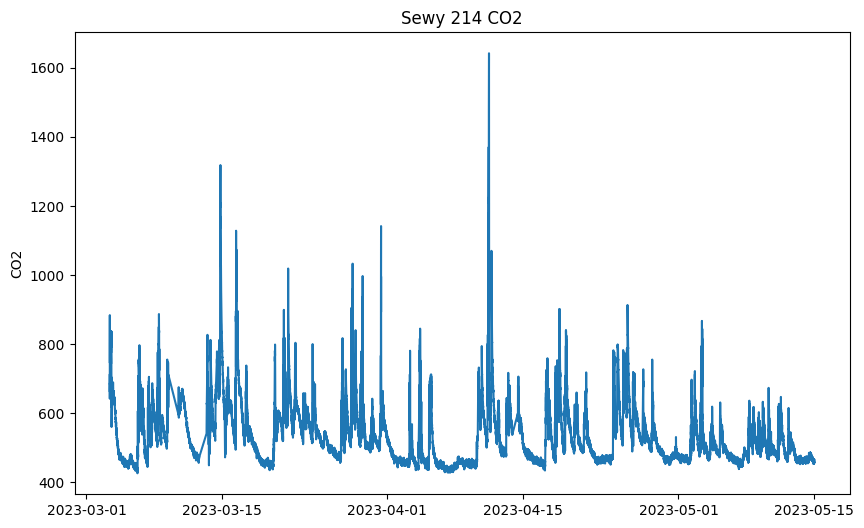

In [13]:
plot_data(reduced_df_temperature, 'temperature')
plot_data(reduced_df_brightness, 'brightness')
plot_data(reduced_df_humidity, 'humidity')
plot_data(reduced_df_airpressure, 'airpressure')
plot_data(reduced_df_co2, 'CO2')

Registros duplicados

In [14]:
def delete_duplicates(df, col_name):
    print(col_name + ' - Número de registros duplicados:', df.index.duplicated().sum())
    if df.index.duplicated().sum() > 0:
        df = df.groupby(df.index).mean()
        print(col_name + ' - Número de registros tras eliminar duplicados:' + str(len(df)))
    else:
        print('No hay registros duplicados')
    return df
    

In [15]:
reduced_df_temperature = delete_duplicates(reduced_df_temperature, 'temperature')
reduced_df_brightness = delete_duplicates(reduced_df_brightness, 'brightness')
reduced_df_humidity = delete_duplicates(reduced_df_humidity, 'humidity')
reduced_df_airpressure = delete_duplicates(reduced_df_airpressure, 'airpressure')
reduced_df_co2 = delete_duplicates(reduced_df_co2, 'CO2')

temperature - Número de registros duplicados: 66
temperature - Número de registros tras eliminar duplicados:19612
brightness - Número de registros duplicados: 137
brightness - Número de registros tras eliminar duplicados:21869
humidity - Número de registros duplicados: 236
humidity - Número de registros tras eliminar duplicados:42250
airpressure - Número de registros duplicados: 155
airpressure - Número de registros tras eliminar duplicados:35850
CO2 - Número de registros duplicados: 624
CO2 - Número de registros tras eliminar duplicados:80434


In [16]:
def fill_gaps_df(df,col_name, boolean=False):
    print(col_name + " - Original data: ", len(df), "rows")
    
    # Rellenamos los valores faltantes
    df = df.resample('min').asfreq()
    if boolean:
        df[col_name] = df[col_name].interpolate(method='ffill')
    else:
        df[col_name] = df[col_name].interpolate(method='linear', limit_direction='both')
    
    print(col_name + " - Updated data: ", len(df), "rows")
    
    return df

In [17]:
reduced_df_temperature = fill_gaps_df(reduced_df_temperature, 'temperature')
reduced_df_brightness = fill_gaps_df(reduced_df_brightness, 'brightness')
reduced_df_humidity = fill_gaps_df(reduced_df_humidity, 'humidity')
reduced_df_airpressure = fill_gaps_df(reduced_df_airpressure, 'airpressure')
reduced_df_co2 = fill_gaps_df(reduced_df_co2, 'CO2')

temperature - Original data:  19612 rows
temperature - Updated data:  104524 rows
brightness - Original data:  21869 rows
brightness - Updated data:  104254 rows
humidity - Original data:  42250 rows
humidity - Updated data:  104548 rows
airpressure - Original data:  35850 rows
airpressure - Updated data:  104549 rows
CO2 - Original data:  80434 rows
CO2 - Updated data:  104550 rows


In [18]:
reduced_df_temperature

temperature
timestamp                       
2023-03-03 09:31:00    19.000000
2023-03-03 09:32:00    18.900000
2023-03-03 09:33:00    18.950000
2023-03-03 09:34:00    19.000000
2023-03-03 09:35:00    19.050000
...                          ...
2023-05-14 23:30:00    25.866667
2023-05-14 23:31:00    25.883333
2023-05-14 23:32:00    25.900000
2023-05-14 23:33:00    25.850000
2023-05-14 23:34:00    25.800000

[104524 rows x 1 columns]

In [19]:
reduced_df_airpressure

airpressure
timestamp                         
2023-03-03 09:31:00  104350.000000
2023-03-03 09:32:00  104355.000000
2023-03-03 09:33:00  104360.000000
2023-03-03 09:34:00  104357.500000
2023-03-03 09:35:00  104355.000000
...                            ...
2023-05-14 23:55:00  104087.647059
2023-05-14 23:56:00  104088.235294
2023-05-14 23:57:00  104088.823529
2023-05-14 23:58:00  104089.411765
2023-05-14 23:59:00  104090.000000

[104549 rows x 1 columns]

In [20]:
reduced_df_brightness

brightness
timestamp                      
2023-03-03 09:31:00  320.000000
2023-03-03 09:32:00  321.013333
2023-03-03 09:33:00  322.026667
2023-03-03 09:34:00  323.040000
2023-03-03 09:35:00  324.053333
...                         ...
2023-05-14 19:00:00    2.500000
2023-05-14 19:01:00    1.875000
2023-05-14 19:02:00    1.250000
2023-05-14 19:03:00    0.625000
2023-05-14 19:04:00    0.000000

[104254 rows x 1 columns]

In [21]:
reduced_df_co2

CO2
timestamp                  
2023-03-03 09:31:00  748.16
2023-03-03 09:32:00  773.76
2023-03-03 09:33:00  780.80
2023-03-03 09:34:00  792.32
2023-03-03 09:35:00  798.72
...                     ...
2023-05-14 23:56:00  455.04
2023-05-14 23:57:00  455.28
2023-05-14 23:58:00  455.52
2023-05-14 23:59:00  455.76
2023-05-15 00:00:00  456.00

[104550 rows x 1 columns]

In [22]:
reduced_df_airpressure

airpressure
timestamp                         
2023-03-03 09:31:00  104350.000000
2023-03-03 09:32:00  104355.000000
2023-03-03 09:33:00  104360.000000
2023-03-03 09:34:00  104357.500000
2023-03-03 09:35:00  104355.000000
...                            ...
2023-05-14 23:55:00  104087.647059
2023-05-14 23:56:00  104088.235294
2023-05-14 23:57:00  104088.823529
2023-05-14 23:58:00  104089.411765
2023-05-14 23:59:00  104090.000000

[104549 rows x 1 columns]

Definimos datos de inicio y fin ignorando primer y último dia

In [23]:
reduced_df_temperature = reduced_df_temperature[(reduced_df_temperature.index >= '2023-03-06') & (reduced_df_temperature.index <= '2023-05-14')]
reduced_df_brightness = reduced_df_brightness[(reduced_df_brightness.index >= '2023-03-06') & (reduced_df_brightness.index <= '2023-05-14')]
reduced_df_humidity = reduced_df_humidity[(reduced_df_humidity.index >= '2023-03-06') & (reduced_df_humidity.index <= '2023-05-14')]
reduced_df_airpressure = reduced_df_airpressure[(reduced_df_airpressure.index >= '2023-03-06') & (reduced_df_airpressure.index <= '2023-05-14')]
reduced_df_co2 = reduced_df_co2[(reduced_df_co2.index >= '2023-03-06') & (reduced_df_co2.index <= '2023-05-14')]
len(reduced_df_temperature), len(reduced_df_brightness), len(reduced_df_humidity), len(reduced_df_airpressure), len(reduced_df_co2)

(99361, 99361, 99361, 99361, 99361)

Normalizamos los datos

In [24]:
def normalize_df(df):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    return df_normalized, scaler

In [25]:
reduced_df_temperature, scaler_temperature = normalize_df(reduced_df_temperature)
reduced_df_brightness, scaler_brightness = normalize_df(reduced_df_brightness)
reduced_df_humidity, scaler_humidity = normalize_df(reduced_df_humidity)
reduced_df_airpressure, scaler_airpressure = normalize_df(reduced_df_airpressure)
reduced_df_co2, scaler_co2 = normalize_df(reduced_df_co2)

Por último, combinamos todos los datos en una misma tabla

In [26]:
# Merge all df into one
completed_df = pd.concat([reduced_df_temperature, reduced_df_brightness, reduced_df_humidity, reduced_df_airpressure, reduced_df_co2], axis=1)
completed_df

temperature  brightness  humidity  airpressure       CO2
timestamp                                                                    
2023-03-06 00:00:00     0.051242    0.011776  0.398703     0.380890  0.012049
2023-03-06 00:01:00     0.051099    0.011806  0.398453     0.379581  0.012207
2023-03-06 00:02:00     0.050956    0.011837  0.398204     0.378272  0.012365
2023-03-06 00:03:00     0.050814    0.011868  0.398802     0.376963  0.013944
2023-03-06 00:04:00     0.050671    0.011899  0.399401     0.374346  0.013154
...                          ...         ...       ...          ...       ...
2023-05-13 23:56:00     0.751622    0.005097  0.514970     0.630017  0.032097
2023-05-13 23:57:00     0.751327    0.005115  0.517964     0.628272  0.032886
2023-05-13 23:58:00     0.751032    0.005132  0.514970     0.627836  0.033675
2023-05-13 23:59:00     0.750737    0.005149  0.515968     0.627400  0.036306
2023-05-14 00:00:00     0.750442    0.005167  0.516966     0.626963  0.034728

[99361 rows x 5 columns]

## Normalización de los valores + añadir periodicidad

In [27]:
day = 60*60*24
year = 365.2425*day

completed_df['seconds'] = completed_df.index.map(pd.Timestamp.timestamp)

# A partir del seno y coseno podemos trabajar también la periodicidad de los datos. Concretamente, la de los dias y el año.

completed_df['day_sin'] = np.sin(completed_df['seconds'] * (2 * np.pi / day))
completed_df['day_cos'] = np.cos(completed_df['seconds'] * (2 * np.pi / day))
completed_df['year_sin'] = np.sin(completed_df['seconds'] * (2 * np.pi / year))
completed_df['year_cos'] = np.cos(completed_df['seconds'] * (2 * np.pi / year))

completed_df.drop(columns=['seconds'], inplace=True)

completed_df

temperature  brightness  humidity  airpressure       CO2  \
timestamp                                                                       
2023-03-06 00:00:00     0.051242    0.011776  0.398703     0.380890  0.012049   
2023-03-06 00:01:00     0.051099    0.011806  0.398453     0.379581  0.012207   
2023-03-06 00:02:00     0.050956    0.011837  0.398204     0.378272  0.012365   
2023-03-06 00:03:00     0.050814    0.011868  0.398802     0.376963  0.013944   
2023-03-06 00:04:00     0.050671    0.011899  0.399401     0.374346  0.013154   
...                          ...         ...       ...          ...       ...   
2023-05-13 23:56:00     0.751622    0.005097  0.514970     0.630017  0.032097   
2023-05-13 23:57:00     0.751327    0.005115  0.517964     0.628272  0.032886   
2023-05-13 23:58:00     0.751032    0.005132  0.514970     0.627836  0.033675   
2023-05-13 23:59:00     0.750737    0.005149  0.515968     0.627400  0.036306   
2023-05-14 00:00:00     0.750442    0.005167  0.516966     0.626963  0.034728   

                          day_sin   day_cos  year_sin  year_cos  
timestamp                                                        
2023-03-06 00:00:00 -1.267246e-11  1.000000  0.892796  0.450461  
2023-03-06 00:01:00  4.363309e-03  0.999990  0.892802  0.450450  
2023-03-06 00:02:00  8.726535e-03  0.999962  0.892807  0.450439  
2023-03-06 00:03:00  1.308960e-02  0.999914  0.892812  0.450429  
2023-03-06 00:04:00  1.745241e-02  0.999848  0.892818  0.450418  
...                           ...       ...       ...       ...  
2023-05-13 23:56:00 -1.745241e-02  0.999848  0.752028 -0.659131  
2023-05-13 23:57:00 -1.308960e-02  0.999914  0.752020 -0.659140  
2023-05-13 23:58:00 -8.726536e-03  0.999962  0.752012 -0.659149  
2023-05-13 23:59:00 -4.363309e-03  0.999990  0.752005 -0.659158  
2023-05-14 00:00:00 -7.111604e-12  1.000000  0.751997 -0.659167  

[99361 rows x 9 columns]

## 5. Creación y estudio de predicciones con LSMT.

Las redes Long Shot Memory Term son las redes neuronales indicadas para llevar a cabo la predicción de valores futuros dentro de series temporales. Dentro de este cuaderno analizaremos los resultados a partir de una implementación manual y con el uso de métodos ya definidos por Tensorflow/PyTorch 

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, InputLayer, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError as mse_tf, MeanAbsoluteError as mae_tf

Antes de comenzar a definir el modelo será necesario detallar el número de datos necesarios para la entrada y la salida. En este caso, se ha optado por predecir hasta 15 minutos en el futuro a partir de los datos de los 60 minutos anteriores. Esta funcionalidad se cumple con el método split_sequences(). Las entradas (input) se localizarán en X, mientras que y será el resultado que dan. 

In [29]:
def split_sequence(df, window_size = 60, target_size = 15):
    X, y = [], []
    for i in range(len(df)-window_size-target_size):
        X.append(df.iloc[i:(i+window_size)].values)
        row = df.iloc[(i+window_size):(i+window_size+target_size)].values
        y.append(row[:, :-4].flatten())
    return np.array(X), np.array(y)

In [30]:
WINDOW_SIZE = 60
TARGET_SIZE = 15
X, y = split_sequence(completed_df, WINDOW_SIZE, TARGET_SIZE)
X.shape, y.shape

((99286, 60, 9), (99286, 75))

In [31]:
X

array([[[ 0.05124179,  0.01177552,  0.39870259, ...,  1.        ,
          0.89279631,  0.4504606 ],
        [ 0.05109906,  0.01180627,  0.39845309, ...,  0.99999048,
          0.89280169,  0.45044994],
        [ 0.05095632,  0.01183702,  0.39820359, ...,  0.99996192,
          0.89280707,  0.45043927],
        ...,
        [ 0.03933137,  0.01352802,  0.40818363, ...,  0.96923091,
          0.89310284,  0.44985256],
        [ 0.03834808,  0.01355876,  0.40918164, ...,  0.96814764,
          0.89310821,  0.44984189],
        [ 0.0373648 ,  0.01358951,  0.41017964, ...,  0.96704594,
          0.89311358,  0.44983122]],

       [[ 0.05109906,  0.01180627,  0.39845309, ...,  0.99999048,
          0.89280169,  0.45044994],
        [ 0.05095632,  0.01183702,  0.39820359, ...,  0.99996192,
          0.89280707,  0.45043927],
        [ 0.05081359,  0.01186776,  0.3988024 , ...,  0.99991433,
          0.89281245,  0.45042861],
        ...,
        [ 0.03834808,  0.01355876,  0.40918164, ...,  

In [32]:
y

array([[0.03638151, 0.01362025, 0.40868263, ..., 0.41167665, 0.36474695,
        0.01894238],
       [0.03539823, 0.013651  , 0.40718563, ..., 0.41317365, 0.36649215,
        0.01854775],
       [0.04424779, 0.01368175, 0.40818363, ..., 0.41017964, 0.36125654,
        0.01815312],
       ...,
       [0.75752212, 0.00487184, 0.52245509, ..., 0.51796407, 0.62827225,
        0.03288608],
       [0.75575221, 0.00488918, 0.5239521 , ..., 0.51497006, 0.62783595,
        0.03367535],
       [0.7539823 , 0.00490652, 0.52095808, ..., 0.51596806, 0.62739965,
        0.03630624]])

In [33]:
lsmt_separation_rows = int(len(X)*0.8)
X_train, X_test = X[:lsmt_separation_rows], X[lsmt_separation_rows:]
y_train, y_test = y[:lsmt_separation_rows], y[lsmt_separation_rows:]

len(X_train), len(X_test), len(y_train), len(y_test)

(79428, 19858, 79428, 19858)

In [34]:
HandMadeLSTM = Sequential()
HandMadeLSTM.add(InputLayer((WINDOW_SIZE, len(completed_df.columns))))
HandMadeLSTM.add(LSTM(64, activation='relu'))
HandMadeLSTM.add(Dense(TARGET_SIZE*(len(completed_df.columns)-4)))

HandMadeLSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75)             │         4,875 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,819 (93.04 KB)

 Trainable params: 23,819 (93.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
modelPath = '../LSMTTensorflow/bestModelSewy214.keras'
checkpoints = ModelCheckpoint(modelPath, save_best_only=True)
HandMadeLSTM.compile(optimizer=Adam(learning_rate=0.001), loss=mse_tf(), metrics=[mae_tf(), RootMeanSquaredError()])

In [36]:
HandMadeLSTM.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[checkpoints])

Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0169 - mean_absolute_error: 0.0599 - root_mean_squared_error: 0.1110 - val_loss: 6.8787e-04 - val_mean_absolute_error: 0.0163 - val_root_mean_squared_error: 0.0262
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 4.3558e-04 - mean_absolute_error: 0.0108 - root_mean_squared_error: 0.0209 - val_loss: 5.9951e-04 - val_mean_absolute_error: 0.0145 - val_root_mean_squared_error: 0.0245
Epoch 3/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 4.0704e-04 - mean_absolute_error: 0.0100 - root_mean_squared_error: 0.0202 - val_loss: 6.2741e-04 - val_mean_absolute_error: 0.0148 - val_root_mean_squared_error: 0.0250
Epoch 4/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 3.9339e-04 - mean_absolute_error: 0.0096 - root_mean_squared_error: 0.0198 - val_loss: 5.4348e-04 - val_mean_absolute_error: 0.0128 - val_root_mean_squared_error: 0.0233
Epoch 5/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 3.83

In [45]:
HandMadeLSTM = load_model(modelPath)

In [46]:
test_predictions = HandMadeLSTM.predict(X_test)
test_predictions.shape

621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


(19872, 300)

In [47]:
y_test

array([[0.76861645, 0.00893803, 0.74610778, ..., 0.7471343 , 0.40314136,
        0.03367535],
       [0.7684006 , 0.00895458, 0.74850299, ..., 0.74679213, 0.40488656,
        0.03402613],
       [0.76818476, 0.00897113, 0.74730539, ..., 0.74644996, 0.40663176,
        0.03437692],
       ...,
       [0.76029242, 0.00409165, 0.52844311, ..., 0.51796407, 0.62827225,
        0.03288608],
       [0.76010004, 0.00410899, 0.52994012, ..., 0.51497006, 0.62783595,
        0.03367535],
       [0.75990766, 0.00412633, 0.52694611, ..., 0.51596806, 0.62739965,
        0.03630624]])

In [48]:
# Destransformamos los datos
def inverse_transform_dataset(predictions, test):
    test_predictions_temperature = scaler_temperature.inverse_transform(predictions[:, ::5]).flatten()
    test_predictions_brightness = scaler_brightness.inverse_transform(predictions[:, 1::5]).flatten()
    test_predictions_humidity = scaler_humidity.inverse_transform(predictions[:, 2::5]).flatten()
    test_predictions_airpressure = scaler_airpressure.inverse_transform(predictions[:, 3::5]).flatten()
    test_predictions_co2 = scaler_co2.inverse_transform(predictions[:, 4::5]).flatten()

    y_test_temperature = scaler_temperature.inverse_transform(test[:, ::5]).flatten()
    y_test_brightness = scaler_brightness.inverse_transform(test[:, 1::5]).flatten()
    y_test_humidity = scaler_humidity.inverse_transform(test[:, 2::5]).flatten()
    y_test_airpressure = scaler_airpressure.inverse_transform(test[:, 3::5]).flatten()
    y_test_co2 = scaler_co2.inverse_transform(test[:, 4::5]).flatten()
    
    return test_predictions_temperature, test_predictions_brightness, test_predictions_humidity, test_predictions_airpressure, test_predictions_co2, y_test_temperature, y_test_brightness, y_test_humidity, y_test_airpressure, y_test_co2

test_predictions_temperature, test_predictions_brightness, test_predictions_humidity, test_predictions_airpressure, test_predictions_co2, y_test_temperature, y_test_brightness, y_test_humidity, y_test_airpressure, y_test_co2 = inverse_transform_dataset(test_predictions, y_test)

In [49]:
def plot_predictions(y_test, test_predictions, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(y_test, label='True')
    plt.plot(test_predictions, label='Predicted')
    plt.title('Sewy 214 ' + col_name)
    plt.ylabel(col_name)
    plt.legend()
    plt.show()
    
def plot_predictions_day(y_test, test_predictions, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(y_test[:1440], label='True')
    plt.plot(test_predictions[:1440], label='Predicted')
    plt.title('Sewy 214 ' + col_name + ' - 1 day')
    plt.ylabel(col_name)
    plt.legend()
    plt.show()

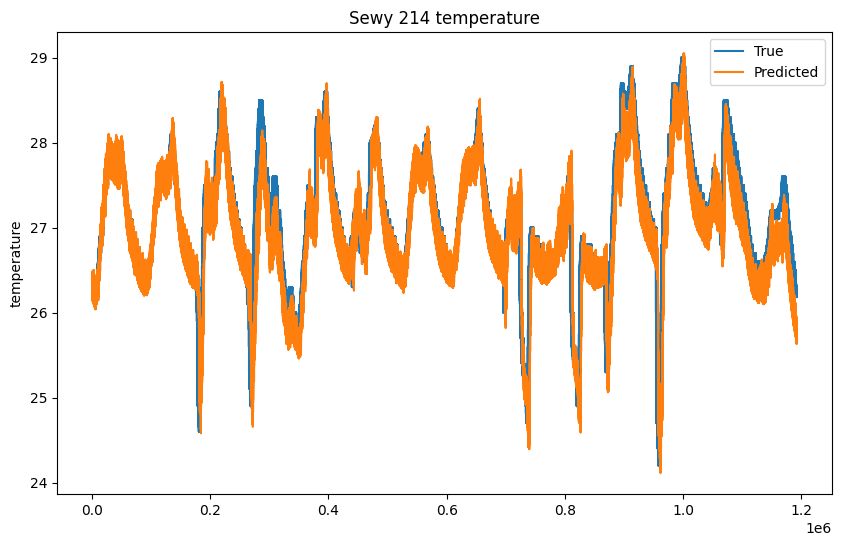

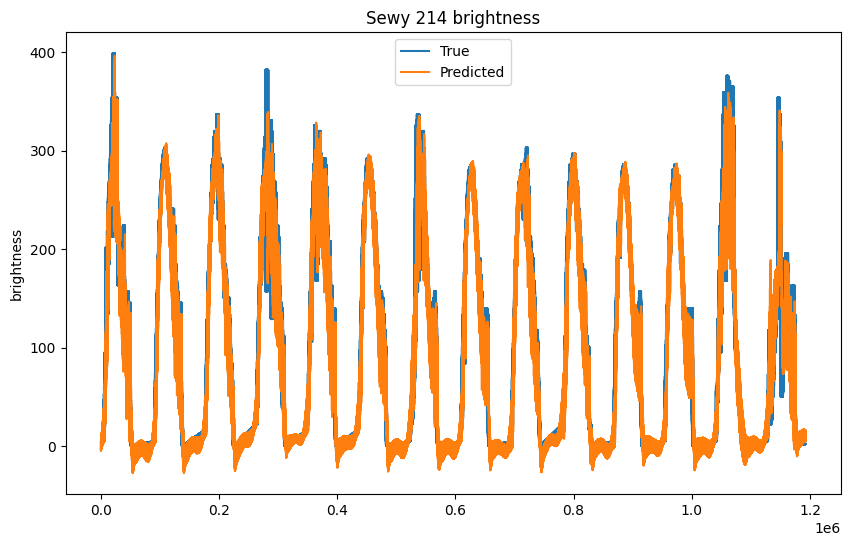

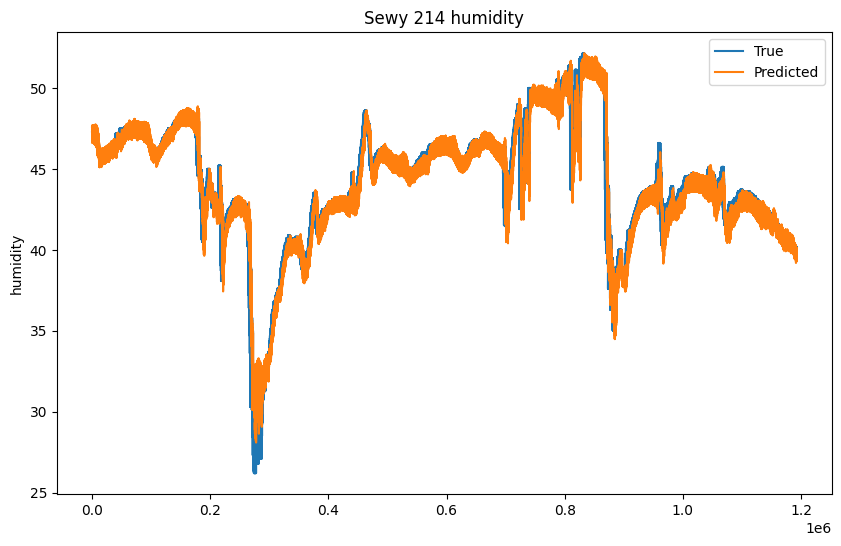

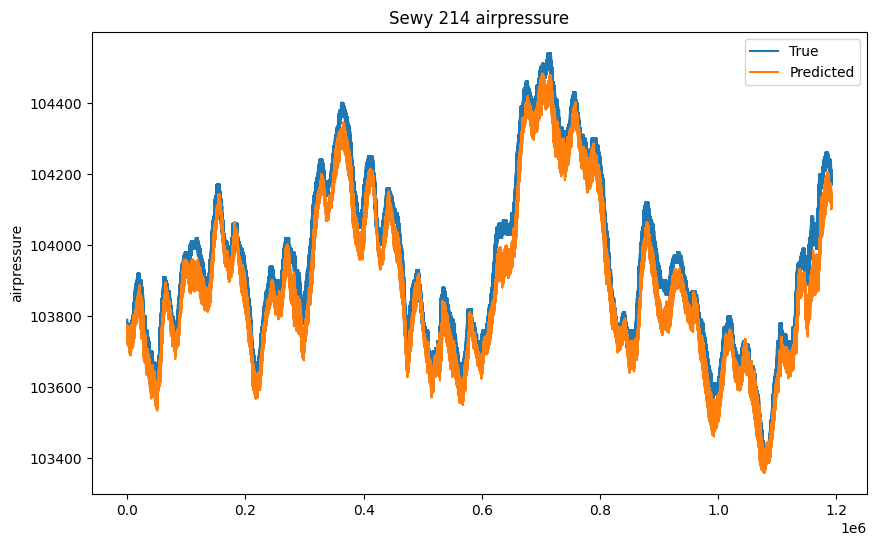

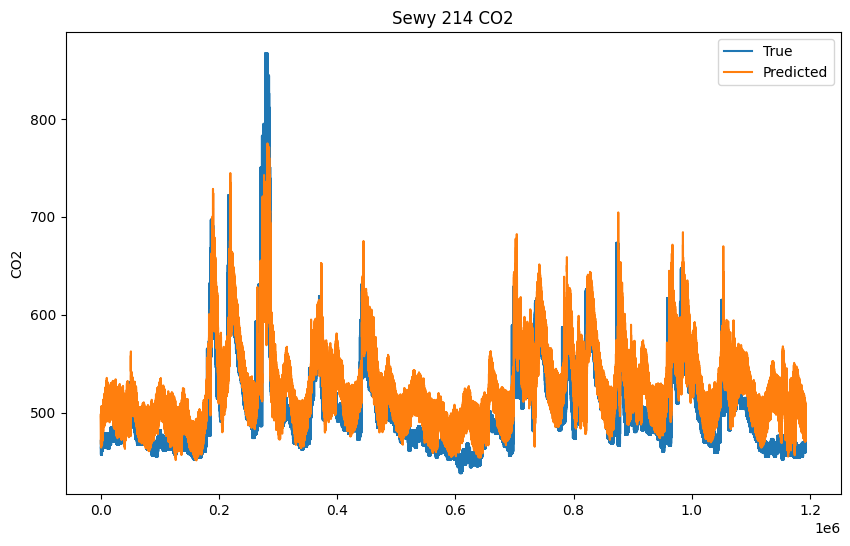

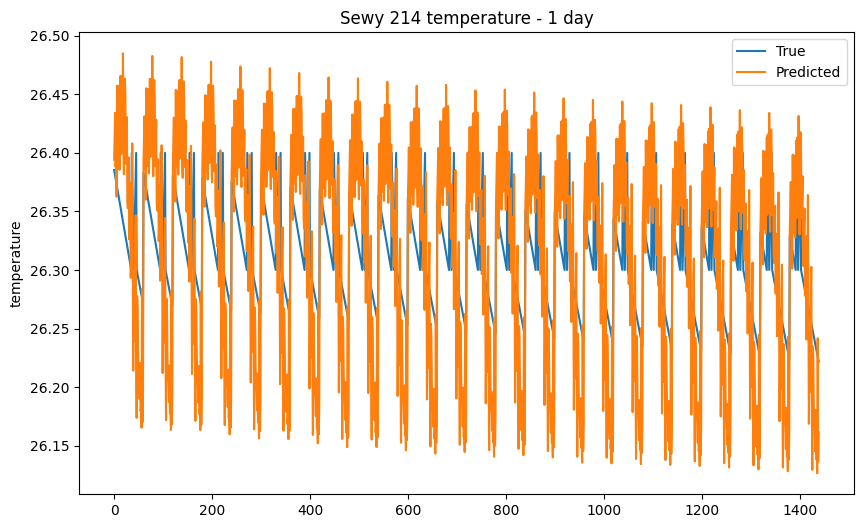

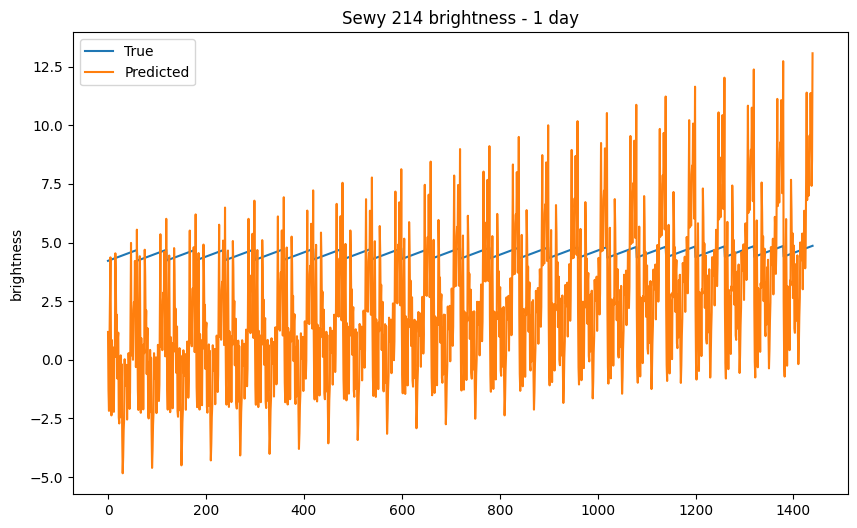

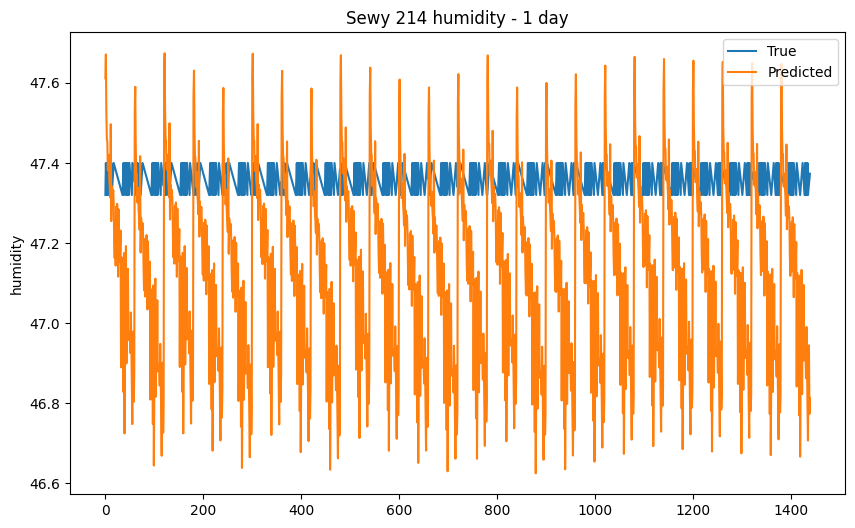

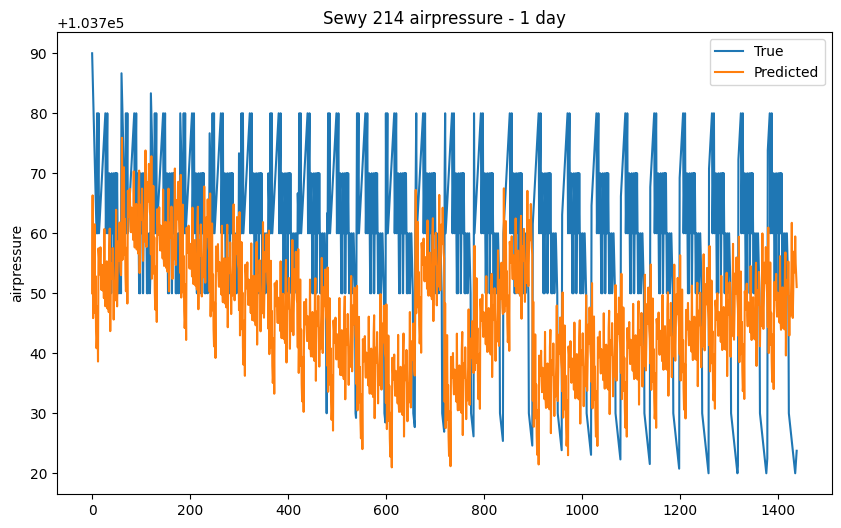

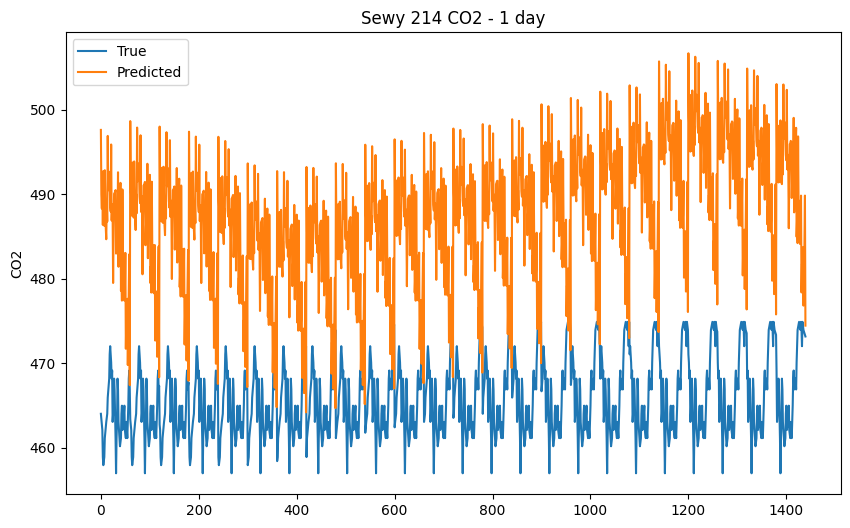

In [50]:
plot_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
plot_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
plot_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
plot_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
plot_predictions(y_test_co2, test_predictions_co2, 'CO2')

plot_predictions_day(y_test_temperature, test_predictions_temperature, 'temperature')
plot_predictions_day(y_test_brightness, test_predictions_brightness, 'brightness')
plot_predictions_day(y_test_humidity, test_predictions_humidity, 'humidity')
plot_predictions_day(y_test_airpressure, test_predictions_airpressure, 'airpressure')
plot_predictions_day(y_test_co2, test_predictions_co2, 'CO2')

In [51]:
# Evaluate the predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_predictions(y_test, test_predictions, name):
    print(name +' - MSE:', mean_squared_error(y_test, test_predictions))
    print(name +' - MAE:', mean_absolute_error(y_test, test_predictions))
    print(name +' - RMSE:', np.sqrt(mean_squared_error(y_test, test_predictions)))
    
evaluate_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
evaluate_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
evaluate_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
evaluate_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
evaluate_predictions(y_test_co2, test_predictions_co2, 'CO2')

temperature - MSE: 0.09611384628654206
temperature - MAE: 0.21317824976051575
temperature - RMSE: 0.31002233191585093
brightness - MSE: 688.8923324679073
brightness - MAE: 16.250730384495284
brightness - RMSE: 26.246758513536626
humidity - MSE: 0.8031720710923931
humidity - MAE: 0.5760246884590722
humidity - RMSE: 0.8961986783589859
airpressure - MSE: 4463.724406875024
airpressure - MAE: 59.843475636418475
airpressure - RMSE: 66.81110990602554
CO2 - MSE: 1223.8956705053774
CO2 - MAE: 29.72302882901108
CO2 - RMSE: 34.984220307238196


### Multistep / Predecir valores dentro de 60 minutos

Evaluamos para 60 minutos, 360 minutos y 720 minutos

In [52]:
horizons = [60, 360, 720]

Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0287 - mean_absolute_error: 0.0956 - root_mean_squared_error: 0.1520 - val_loss: 0.0013 - val_mean_absolute_error: 0.0235 - val_root_mean_squared_error: 0.0365
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - loss: 9.9496e-04 - mean_absolute_error: 0.0161 - root_mean_squared_error: 0.0315 - val_loss: 0.0010 - val_mean_absolute_error: 0.0191 - val_root_mean_squared_error: 0.0322
Epoch 3/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - loss: 9.0767e-04 - mean_absolute_error: 0.0149 - root_mean_squared_error: 0.0301 - val_loss: 0.0011 - val_mean_absolute_error: 0.0196 - val_root_mean_squared_error: 0.0332
Epoch 4/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - loss: 8.7387e-04 - mean_absolute_error: 0.0145 - root_mean_squared_error: 0.0296 - val_loss: 0.0010 - val_mean_absolute_error: 0.0184 - val_root_mean_squared_error: 0.0319
Epoch 5/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - loss: 8.5070e-04 - mean_abso

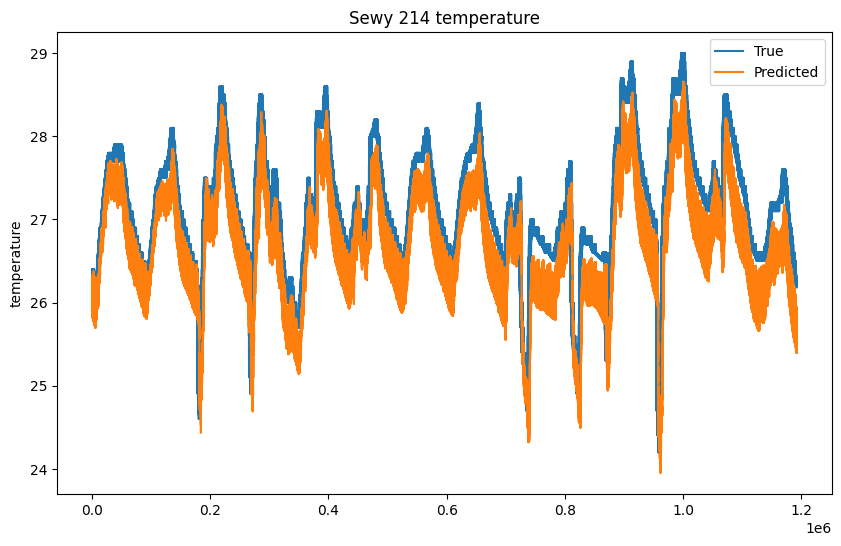

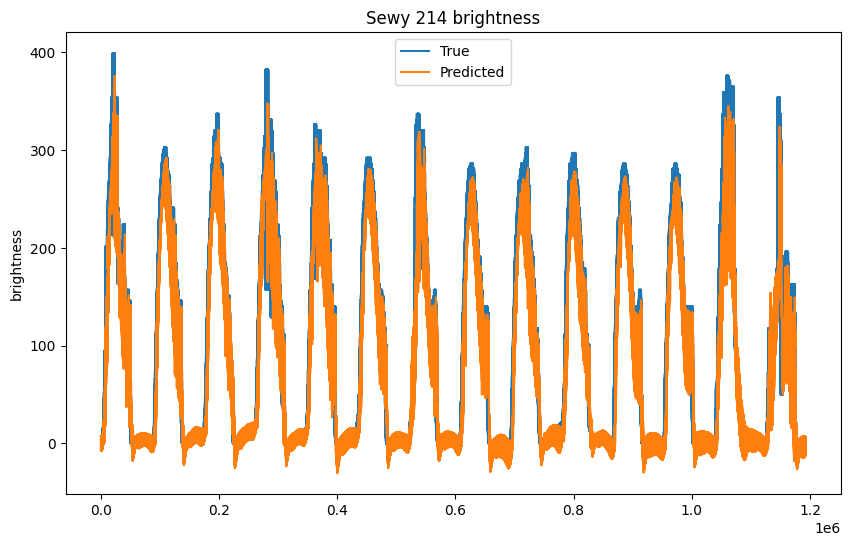

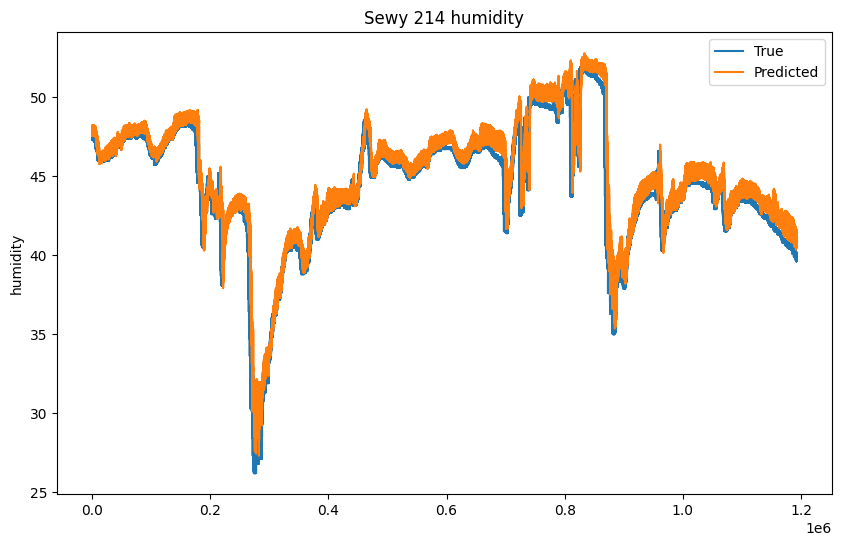

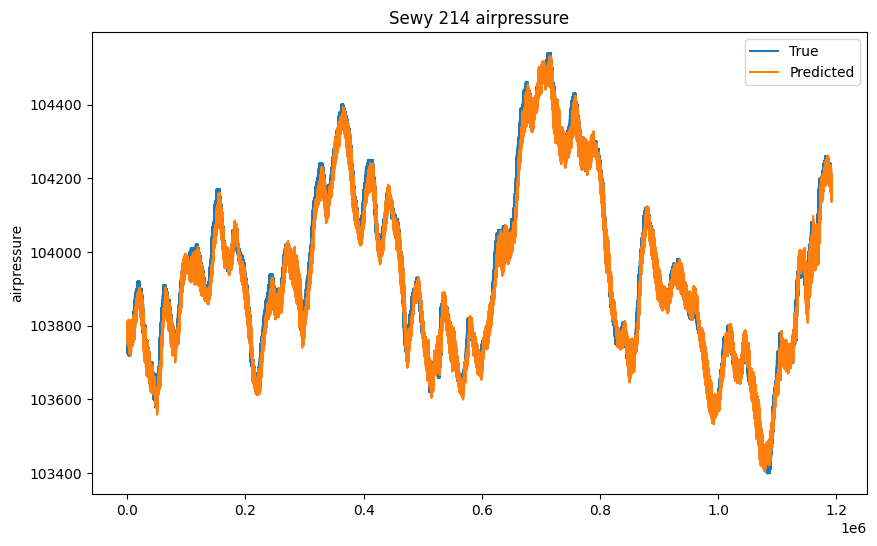

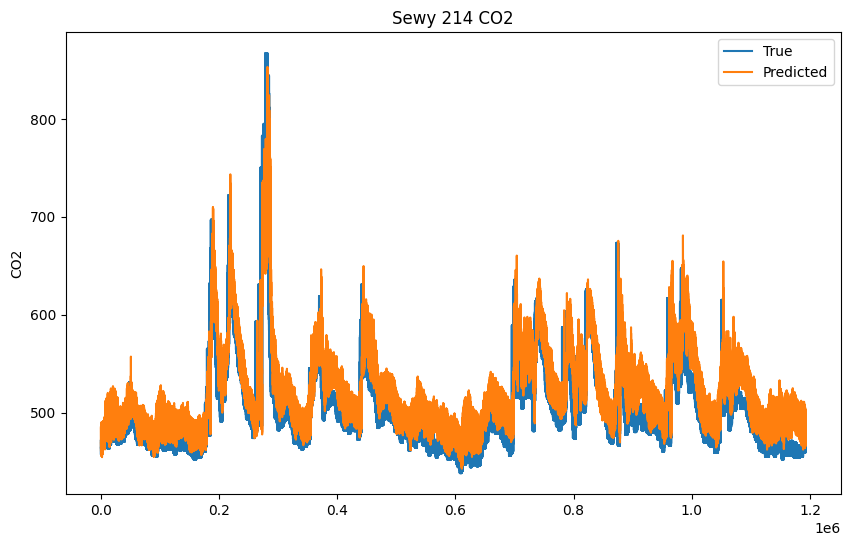

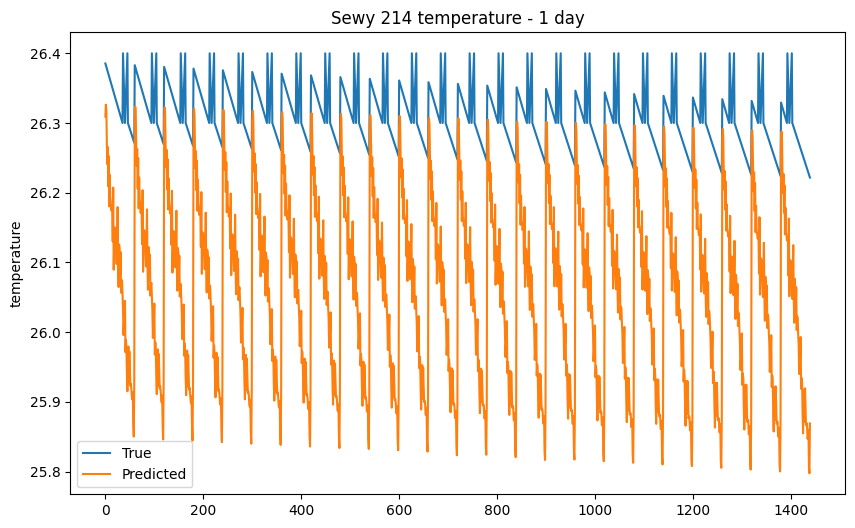

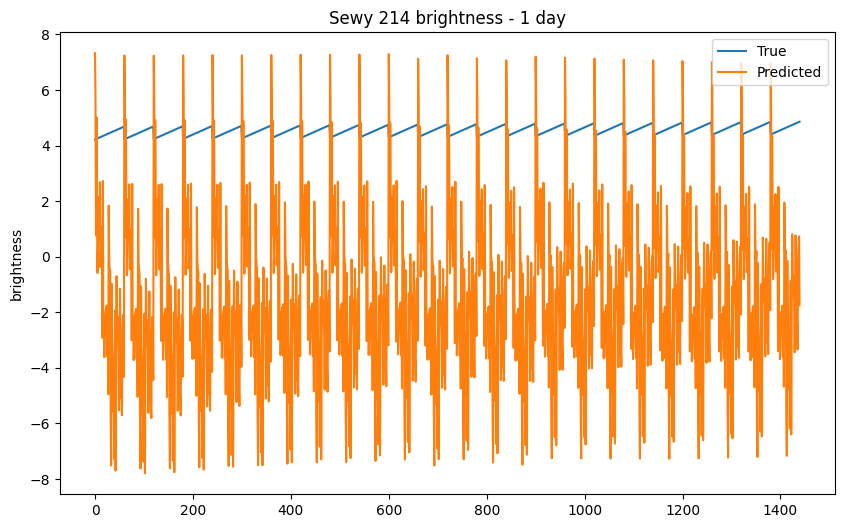

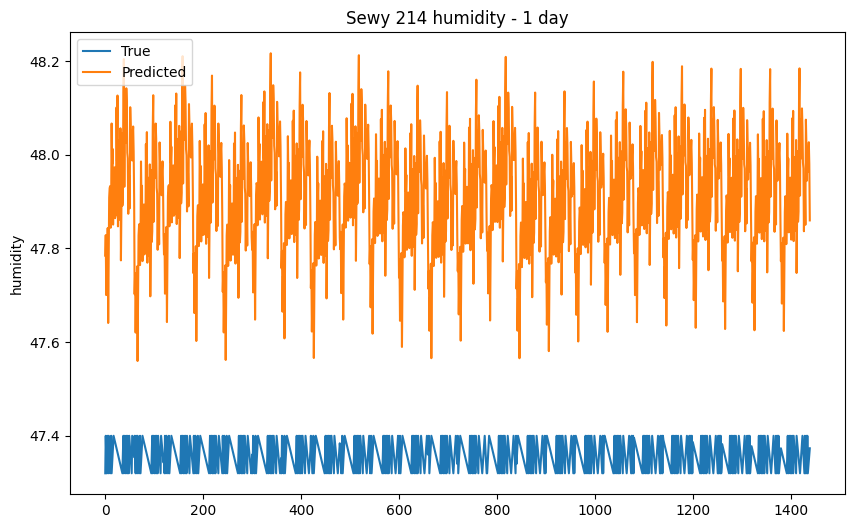

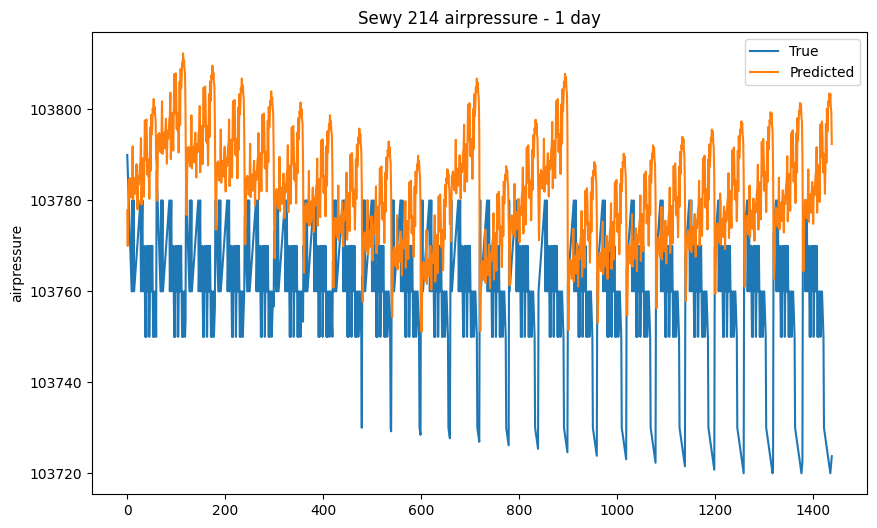

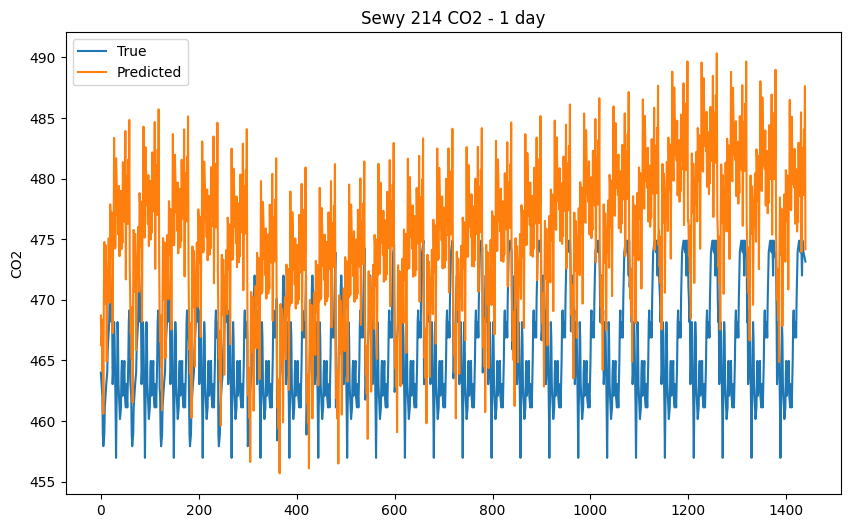

temperature - MSE: 0.271945829259427
temperature - MAE: 0.4705602447956415
temperature - RMSE: 0.5214842560034071
brightness - MSE: 911.4390356119234
brightness - MAE: 20.248475783076703
brightness - RMSE: 30.190048618906253
humidity - MSE: 0.9937223952691406
humidity - MAE: 0.7083320340135101
humidity - RMSE: 0.9968562560716268
airpressure - MSE: 893.6777290102334
airpressure - MAE: 22.91843544495736
airpressure - RMSE: 29.894443112562467
CO2 - MSE: 931.0945881386424
CO2 - MAE: 25.761303616905998
CO2 - RMSE: 30.513842565934603
Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0313 - mean_absolute_error: 0.1074 - root_mean_squared_error: 0.1619 - val_loss: 0.0036 - val_mean_absolute_error: 0.0420 - val_root_mean_squared_error: 0.0596
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0030 - mean_absolute_error: 0.0336 - root_mean_squared_error: 0.0548 - val_loss: 0.0031 - val_mean_absolute_error: 0.0376 - val_root_mean_squared_error: 0.0555
Epoch 3/20
1986/19

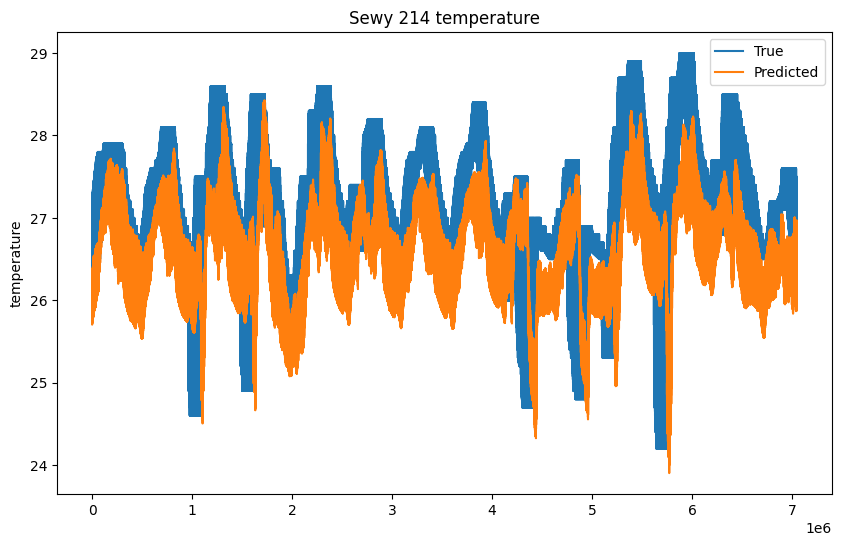

c:\Users\IvO\Desktop\testGit\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


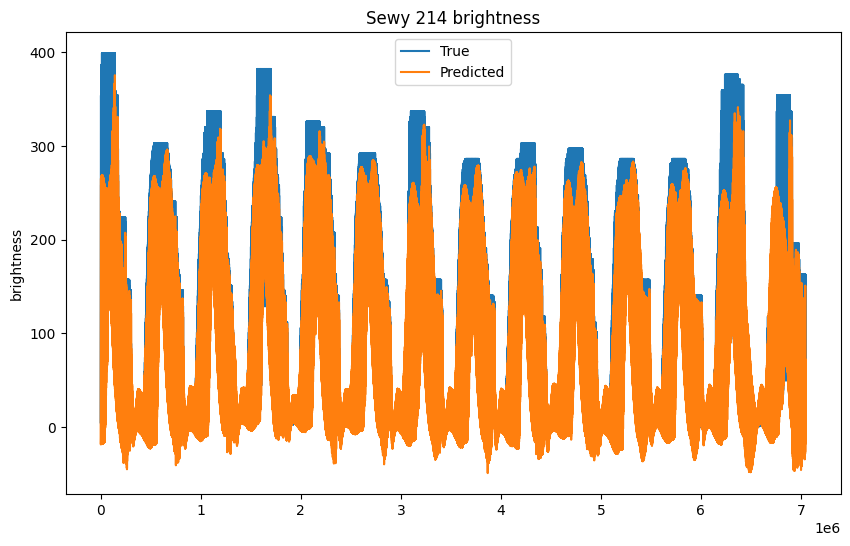

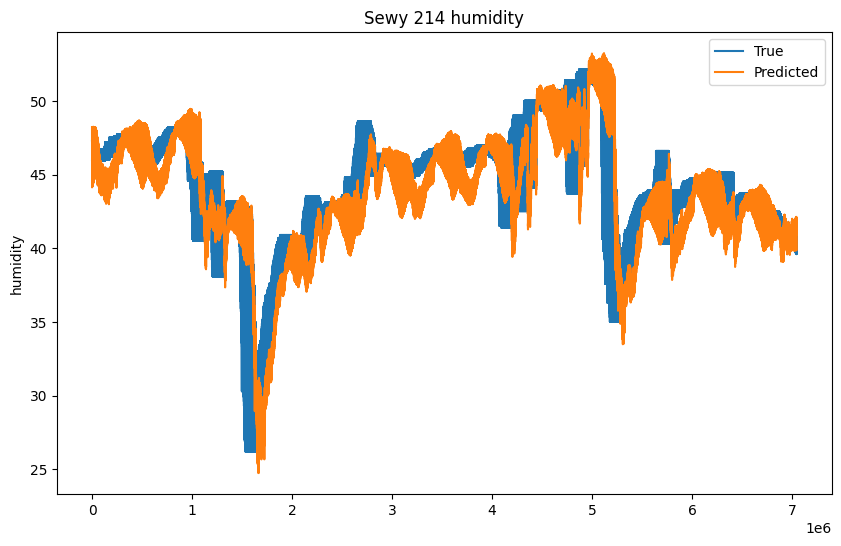

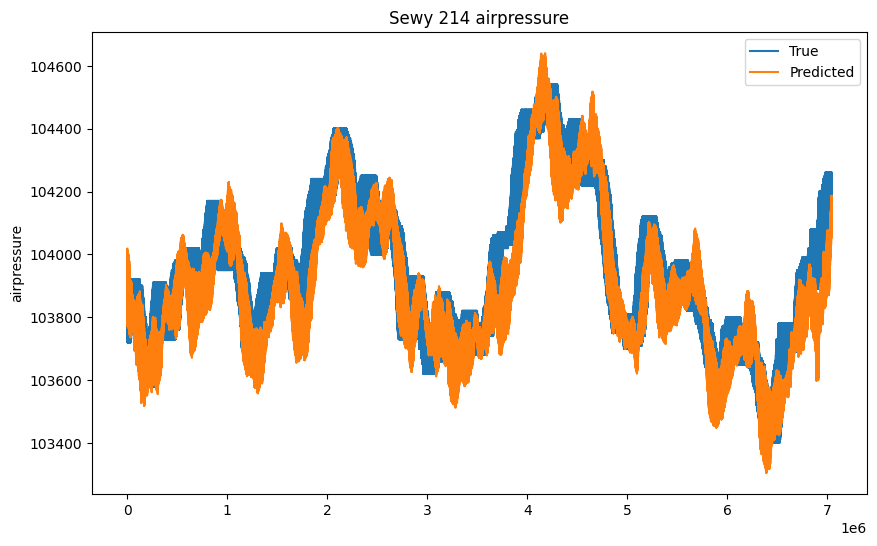

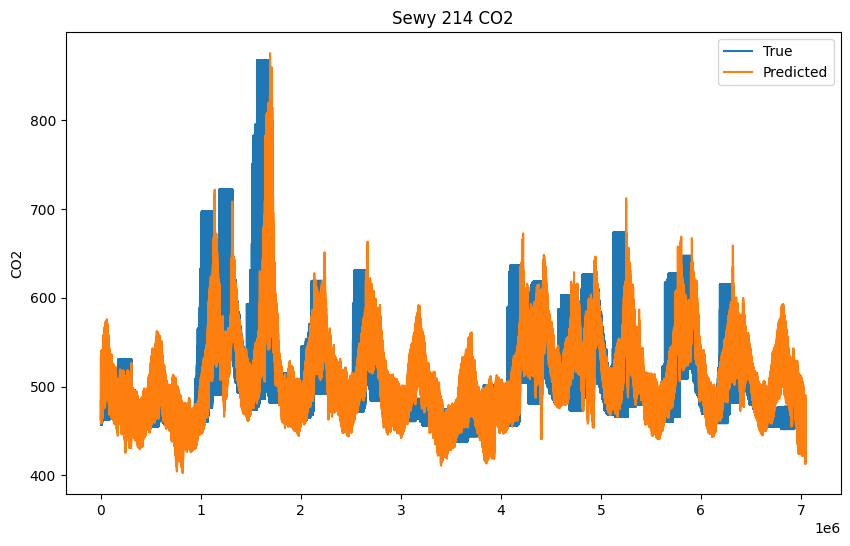

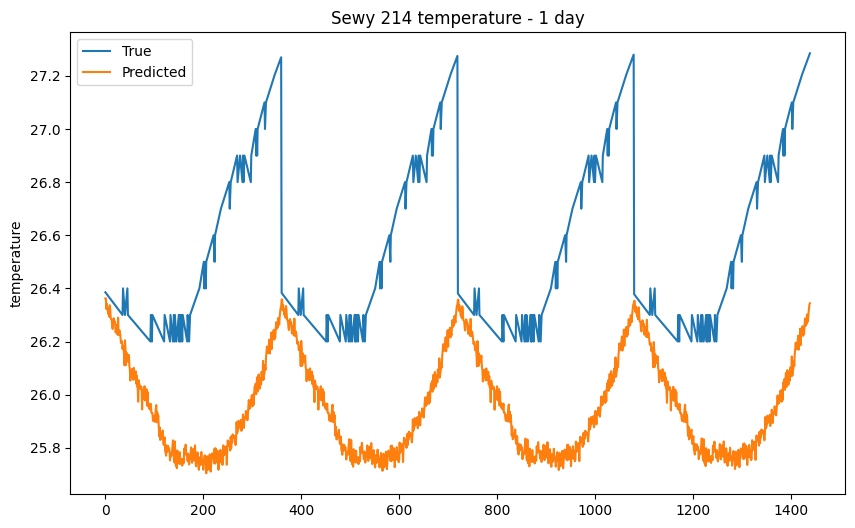

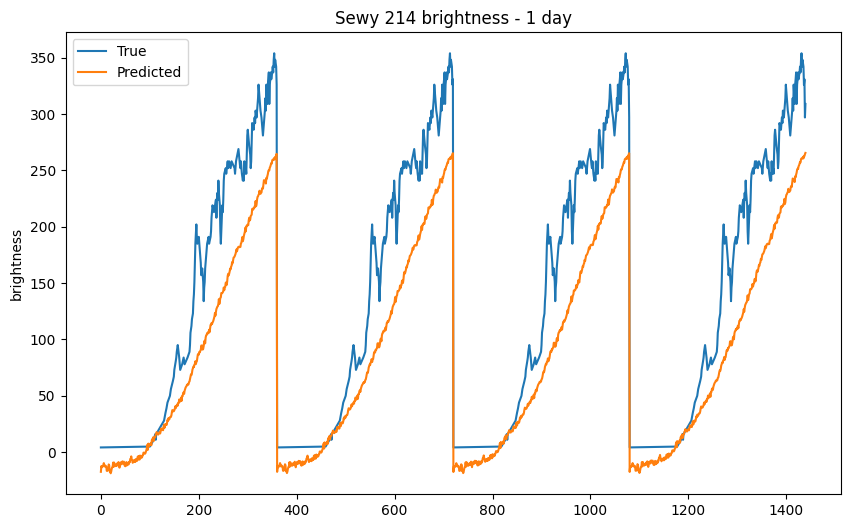

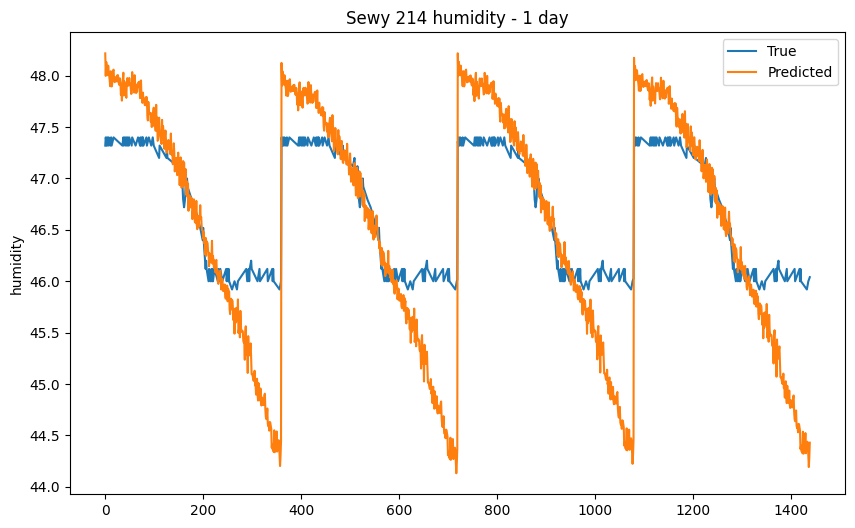

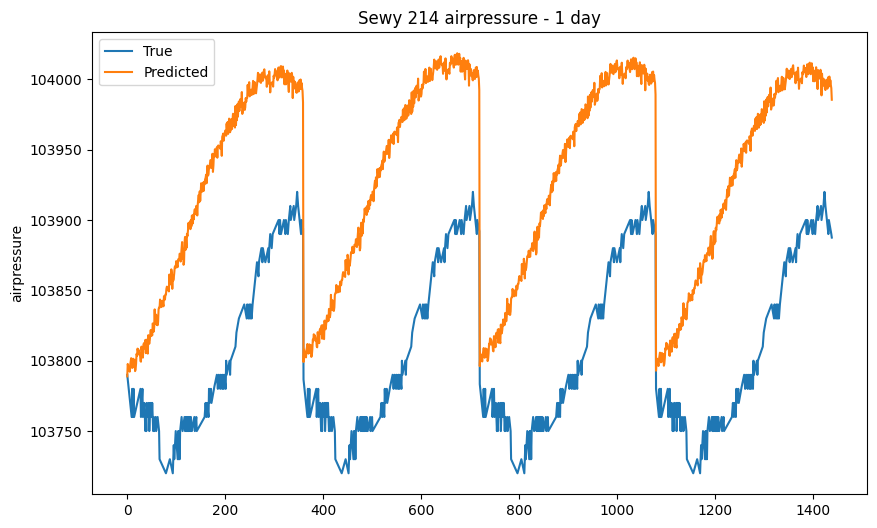

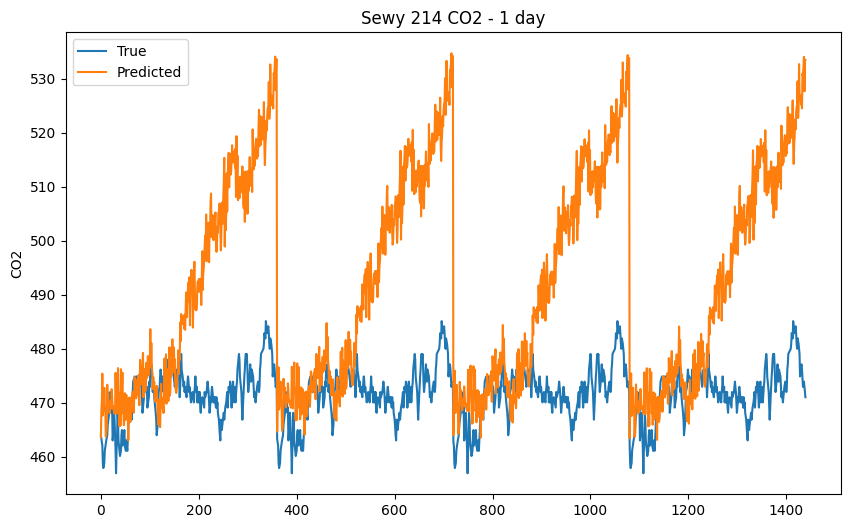

temperature - MSE: 0.5789429824555427
temperature - MAE: 0.6444996482877815
temperature - RMSE: 0.7608830281032313
brightness - MSE: 2291.819633287991
brightness - MAE: 35.48865109115528
brightness - RMSE: 47.87295304540959
humidity - MSE: 5.125505832505715
humidity - MAE: 1.5137549100180898
humidity - RMSE: 2.263958001488922
airpressure - MSE: 10858.656357267624
airpressure - MAE: 80.67730381117026
airpressure - RMSE: 104.20487684013462
CO2 - MSE: 1481.443356050006
CO2 - MAE: 26.99822258596246
CO2 - RMSE: 38.48952267890583
Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0319 - mean_absolute_error: 0.1102 - root_mean_squared_error: 0.1642 - val_loss: 0.0049 - val_mean_absolute_error: 0.0512 - val_root_mean_squared_error: 0.0703
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0434 - root_mean_squared_error: 0.0670 - val_loss: 0.0044 - val_mean_absolute_error: 0.0463 - val_root_mean_squared_error: 0.0661
Epoch 3/20
1986/1986 ━

c:\Users\IvO\Desktop\testGit\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


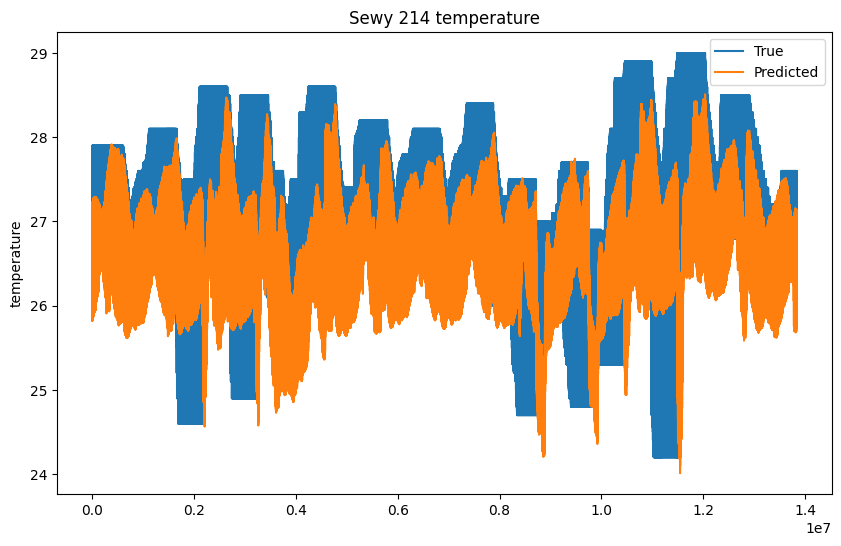

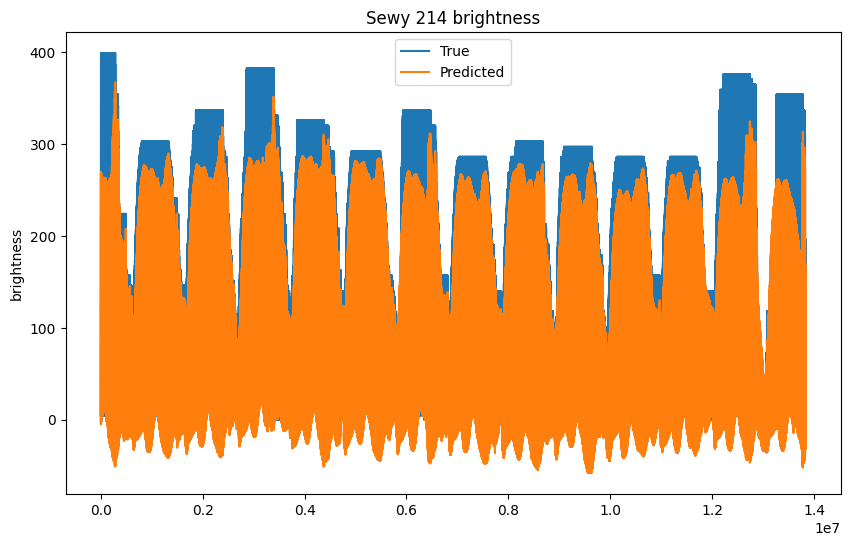

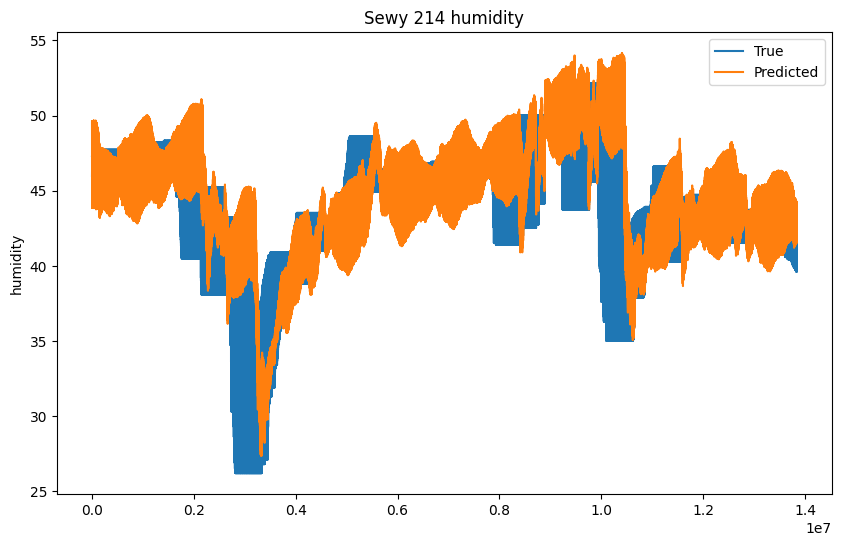

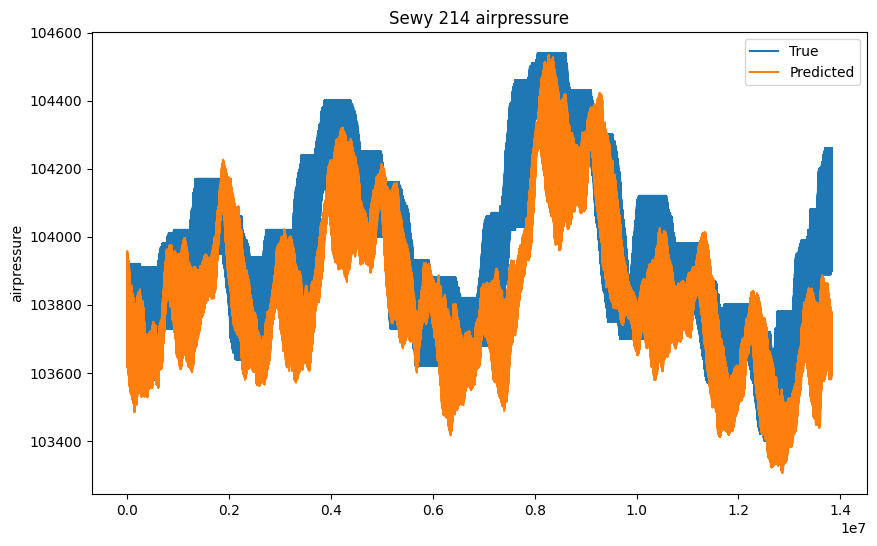

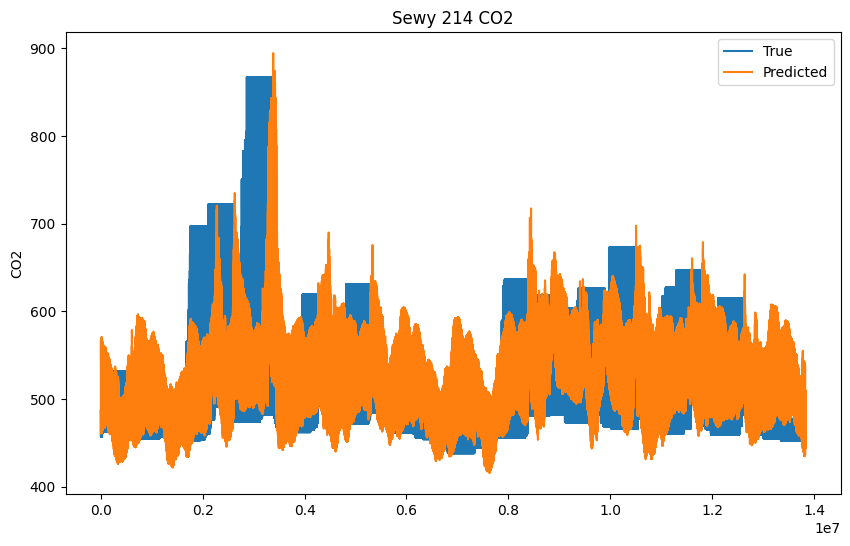

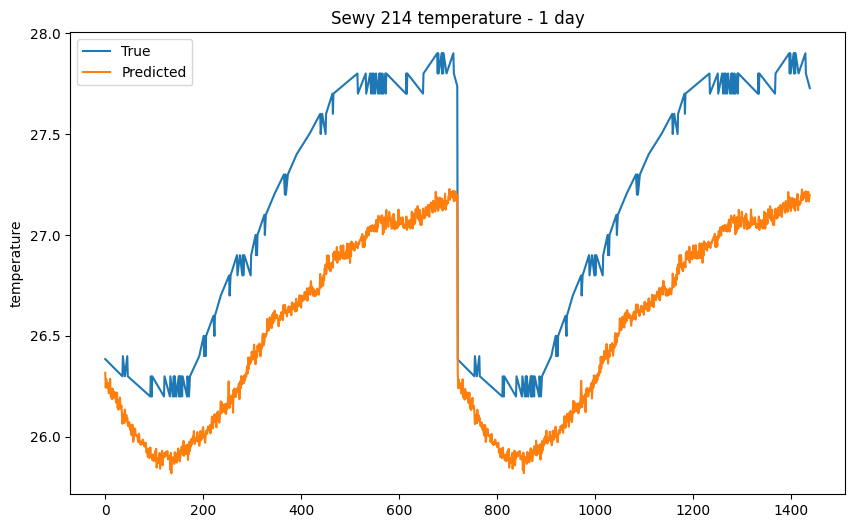

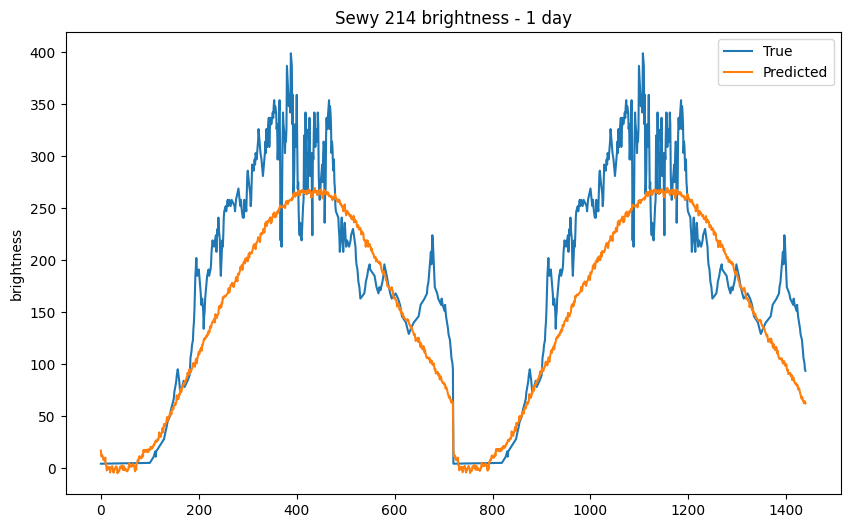

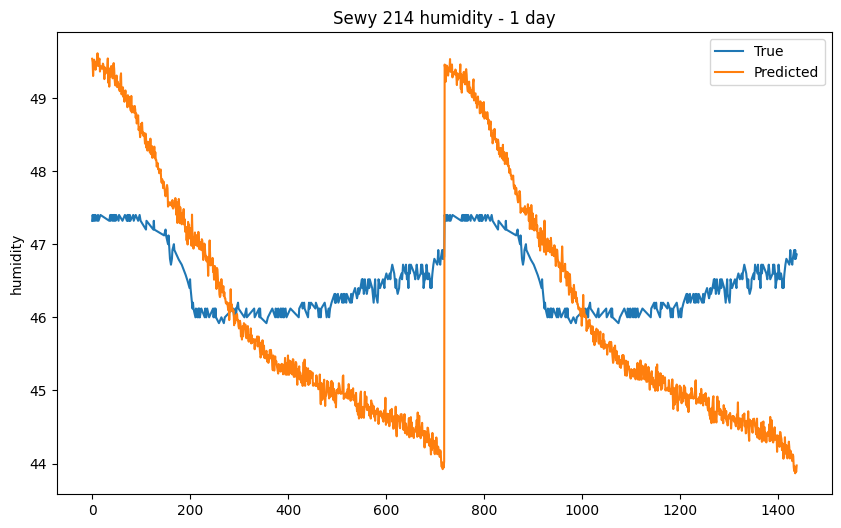

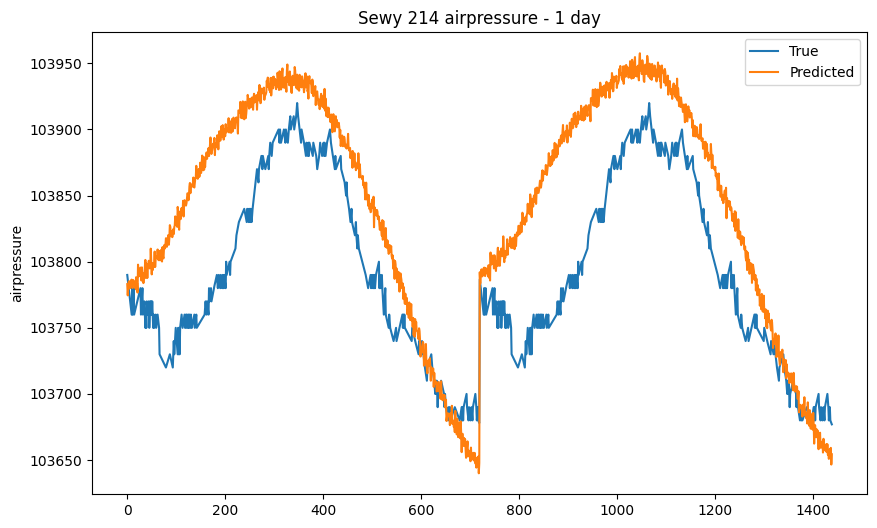

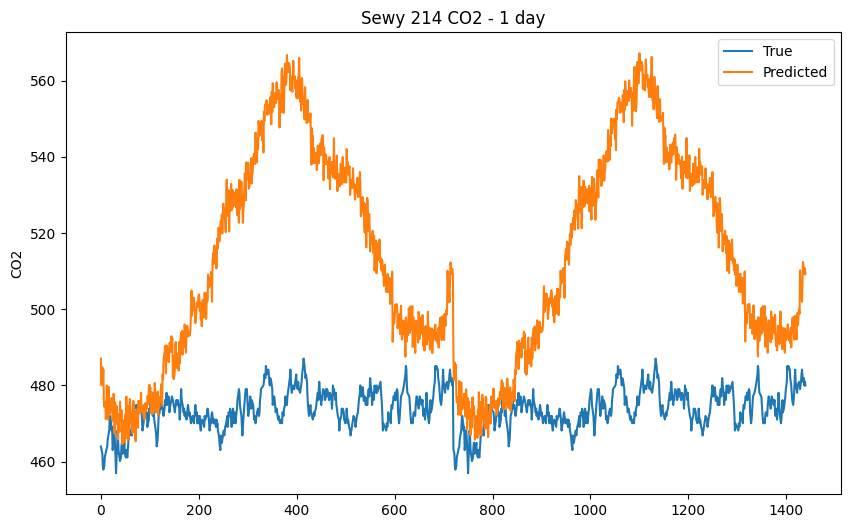

temperature - MSE: 0.6731854517614314
temperature - MAE: 0.6828815990094442
temperature - RMSE: 0.820478794218005
brightness - MSE: 1959.6005983503767
brightness - MAE: 32.69466231396335
brightness - RMSE: 44.26737623070038
humidity - MSE: 7.936311349929396
humidity - MAE: 1.9537839706781601
humidity - RMSE: 2.817145958222505
airpressure - MSE: 30830.578059393152
airpressure - MAE: 136.2097071476107
airpressure - RMSE: 175.58638346806154
CO2 - MSE: 2048.2475869740438
CO2 - MAE: 35.07023635301426
CO2 - RMSE: 45.25756938871158


In [53]:
for horizon in horizons:
    X, y = split_sequence(completed_df, 1, horizon)
    X_train, X_test = X[:lsmt_separation_rows], X[lsmt_separation_rows:]
    y_train, y_test = y[:lsmt_separation_rows], y[lsmt_separation_rows:]

    HandMadeLSTM = Sequential()
    HandMadeLSTM.add(InputLayer((1, len(completed_df.columns))))
    HandMadeLSTM.add(LSTM(64, activation='relu'))
    HandMadeLSTM.add(Dense(horizon*(len(completed_df.columns)-4)))

    modelPath = f'../LSMTTensorflow/bestModel_sewy_214_{horizon}.keras'
    checkpoints = ModelCheckpoint(modelPath, save_best_only=True)
    HandMadeLSTM.compile(optimizer=Adam(learning_rate=0.001), loss=mse_tf(), metrics=[mae_tf(), RootMeanSquaredError()])

    HandMadeLSTM.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[checkpoints])

    HandMadeLSTM = load_model(modelPath)

    test_predictions_temperature, test_predictions_brightness, test_predictions_humidity, test_predictions_airpressure, test_predictions_co2, y_test_temperature, y_test_brightness, y_test_humidity, y_test_airpressure, y_test_co2 = inverse_transform_dataset(HandMadeLSTM.predict(X_test), y_test)
    
    plot_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
    plot_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
    plot_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
    plot_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
    plot_predictions(y_test_co2, test_predictions_co2, 'CO2')

    plot_predictions_day(y_test_temperature, test_predictions_temperature, 'temperature')
    plot_predictions_day(y_test_brightness, test_predictions_brightness, 'brightness')
    plot_predictions_day(y_test_humidity, test_predictions_humidity, 'humidity')
    plot_predictions_day(y_test_airpressure, test_predictions_airpressure, 'airpressure')
    plot_predictions_day(y_test_co2, test_predictions_co2, 'CO2')
    
    evaluate_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
    evaluate_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
    evaluate_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
    evaluate_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
    evaluate_predictions(y_test_co2, test_predictions_co2, 'CO2')
    
    

In [54]:
# Guardamos los datos necesarios para transformar los datos de normalización a los datos originales
dump(scaler_temperature, open('scalers/sewy/scaler_temperature_sewy_214.pkl', 'wb'))
dump(scaler_brightness, open('scalers/sewy/scaler_brightness_sewy_214.pkl', 'wb'))
dump(scaler_humidity, open('scalers/sewy/scaler_humidity_sewy_214.pkl', 'wb'))
dump(scaler_airpressure, open('scalers/sewy/scaler_airpressure_sewy_214.pkl', 'wb'))
dump(scaler_co2, open('scalers/sewy/scaler_co2_sewy_214.pkl', 'wb'))


In [55]:
scaler_temperature.data_max_, scaler_brightness.data_max_, scaler_humidity.data_max_, scaler_airpressure.data_max_, scaler_co2.data_max_, scaler_temperature.data_min_, scaler_brightness.data_min_, scaler_humidity.data_min_, scaler_airpressure.data_min_, scaler_co2.data_min_

(array([29.]),
 array([472.]),
 array([55.8]),
 array([104890.]),
 array([1642.24]),
 array([17.7]),
 array([0.]),
 array([22.4]),
 array([102980.]),
 array([425.92]))